<font face = "Time New Roman" size = 6>Import need pacages</font>

In [228]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from matplotlib.pyplot import MultipleLocator

<font face = "Time New Roman" size = 6>1. Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

part3_result.csv is the file without deleting the Non registered organizations 
It's used to compare the result
All the file need be modified manumally before importing

In [229]:
#Orginal_data = pd.read_csv('./Original_dataset.csv',encoding = "ISO-8859-1")
#Causes_data = pd.read_csv('./Original_Causes.csv',encoding = "ISO-8859-1")

In [230]:
#combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign Id']) #Combined data set
#combined_data.to_csv('New_original_combined_data.csv', index=None)


In [231]:
# Here need change the csv file from part3_result a little bit 
# Delete the space front and end of Campaign_Goal manually
# Change the number into number type instead of accounting type
# Or it can be changed into numeric number
combined_data = pd.read_csv('./Part3_result.csv',encoding = "ISO-8859-1")
#combined_data = pd.read_csv('./Final_data.csv',encoding = "ISO-8859-1")

In [232]:
combined_data.shape

(10139, 79)

In [233]:
columns_name = combined_data.columns

In [234]:
columns_name

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*', 'Receiving NPO Id*', 'NPO Status*', 'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*', 'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors', 'Campaign Goal', 'Campaign Completion Rate',
       'Days Left for Campaign', 'Campaign Start Date', 'Campaign End Date', 'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id', 'Campaign Image2 Id', 'Campaign Image3 Id',
       'Campaign Image4 Id', 'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1', 'Impact Message 2', 'Impact Message 3', 'Impact Message 4', 'Impact Message 5', 'Custom Amount 1',
       'Custom Amount 2', 'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign', 'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare', 'Org Cause Arts & Heritage',
       'Org Cause Children & Youth', 'Org Cause Community', 'Org Cause Disabilit

In [235]:
columns_name

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*', 'Receiving NPO Id*', 'NPO Status*', 'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*', 'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors', 'Campaign Goal', 'Campaign Completion Rate',
       'Days Left for Campaign', 'Campaign Start Date', 'Campaign End Date', 'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id', 'Campaign Image2 Id', 'Campaign Image3 Id',
       'Campaign Image4 Id', 'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1', 'Impact Message 2', 'Impact Message 3', 'Impact Message 4', 'Impact Message 5', 'Custom Amount 1',
       'Custom Amount 2', 'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign', 'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare', 'Org Cause Arts & Heritage',
       'Org Cause Children & Youth', 'Org Cause Community', 'Org Cause Disabilit

In [236]:
# change the columns name
for i in range(len(columns_name)):
    combined_data = combined_data.rename(columns={columns_name[i] : columns_name[i].replace(" ","_")})



In [237]:
columns_name = combined_data.columns

In [238]:
for i in range(len(columns_name)):
    combined_data = combined_data.rename(columns={columns_name[i] : columns_name[i].replace('*','')})

<AxesSubplot: >

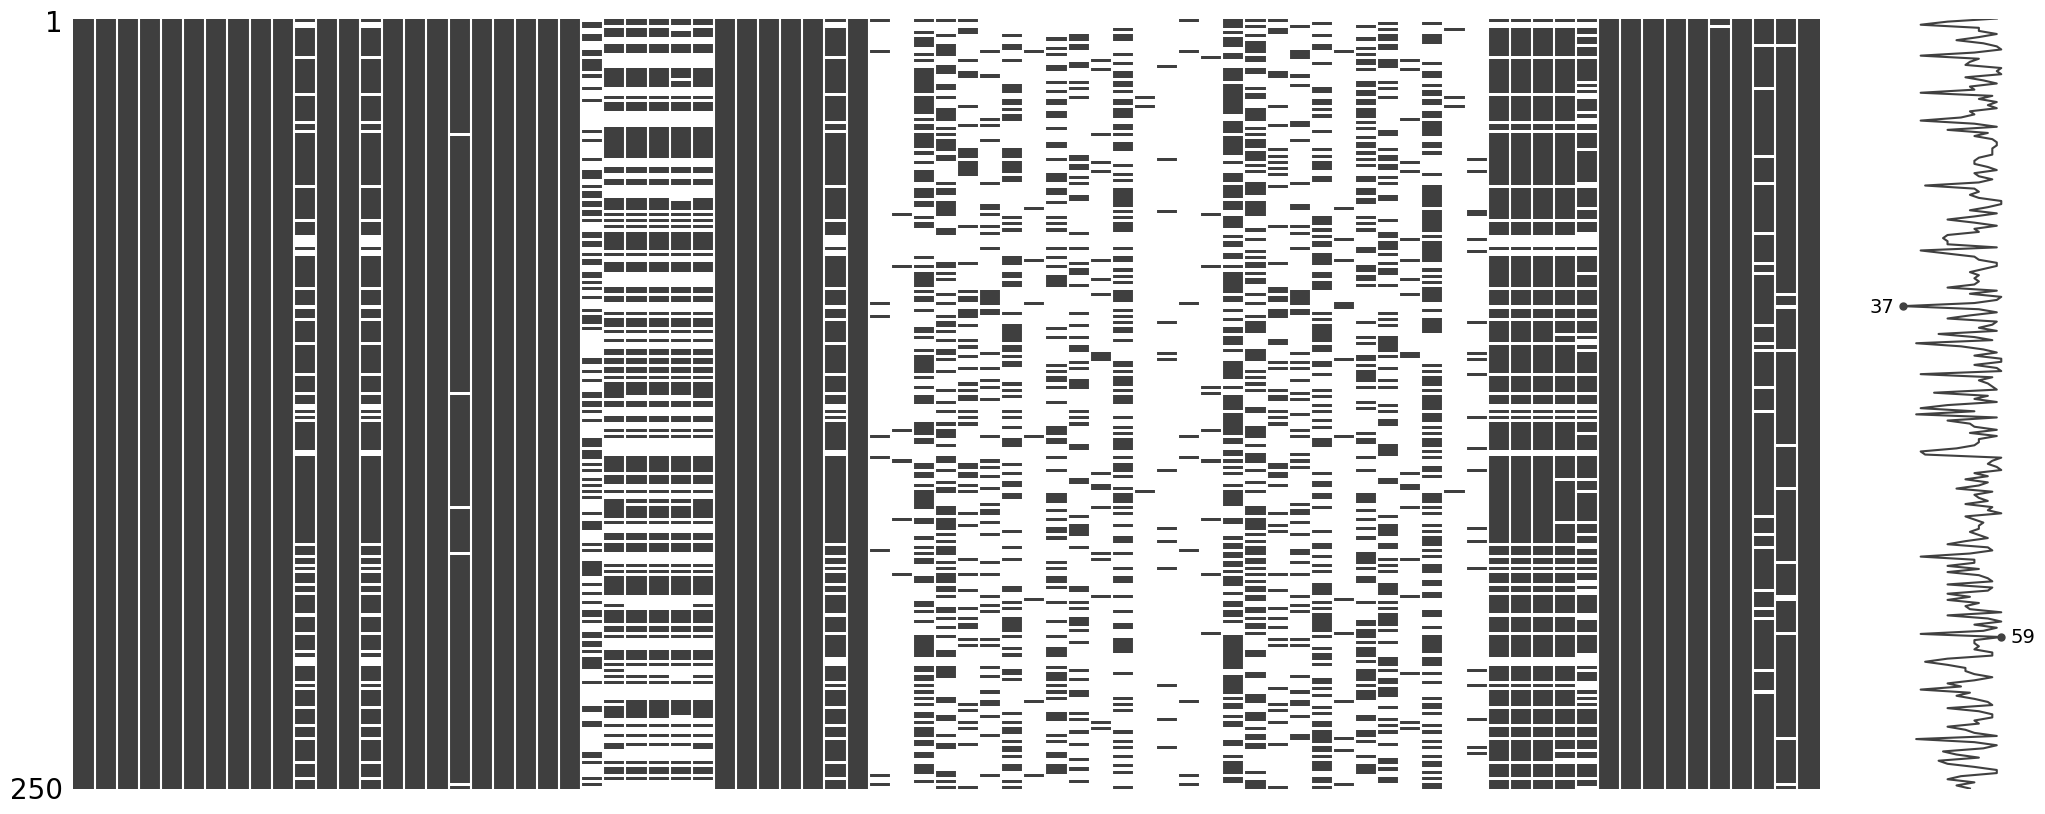

In [239]:
msno.matrix(combined_data.sample(250))

In [240]:
combined_data.columns #Show the columns of data set

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name', 'Receiving_NPO_Id', 'NPO_Status', 'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount', 'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community', 'Org_Cause_Disability', 'Org

In [241]:
extract_data = combined_data #[Need_variable]


<AxesSubplot: >

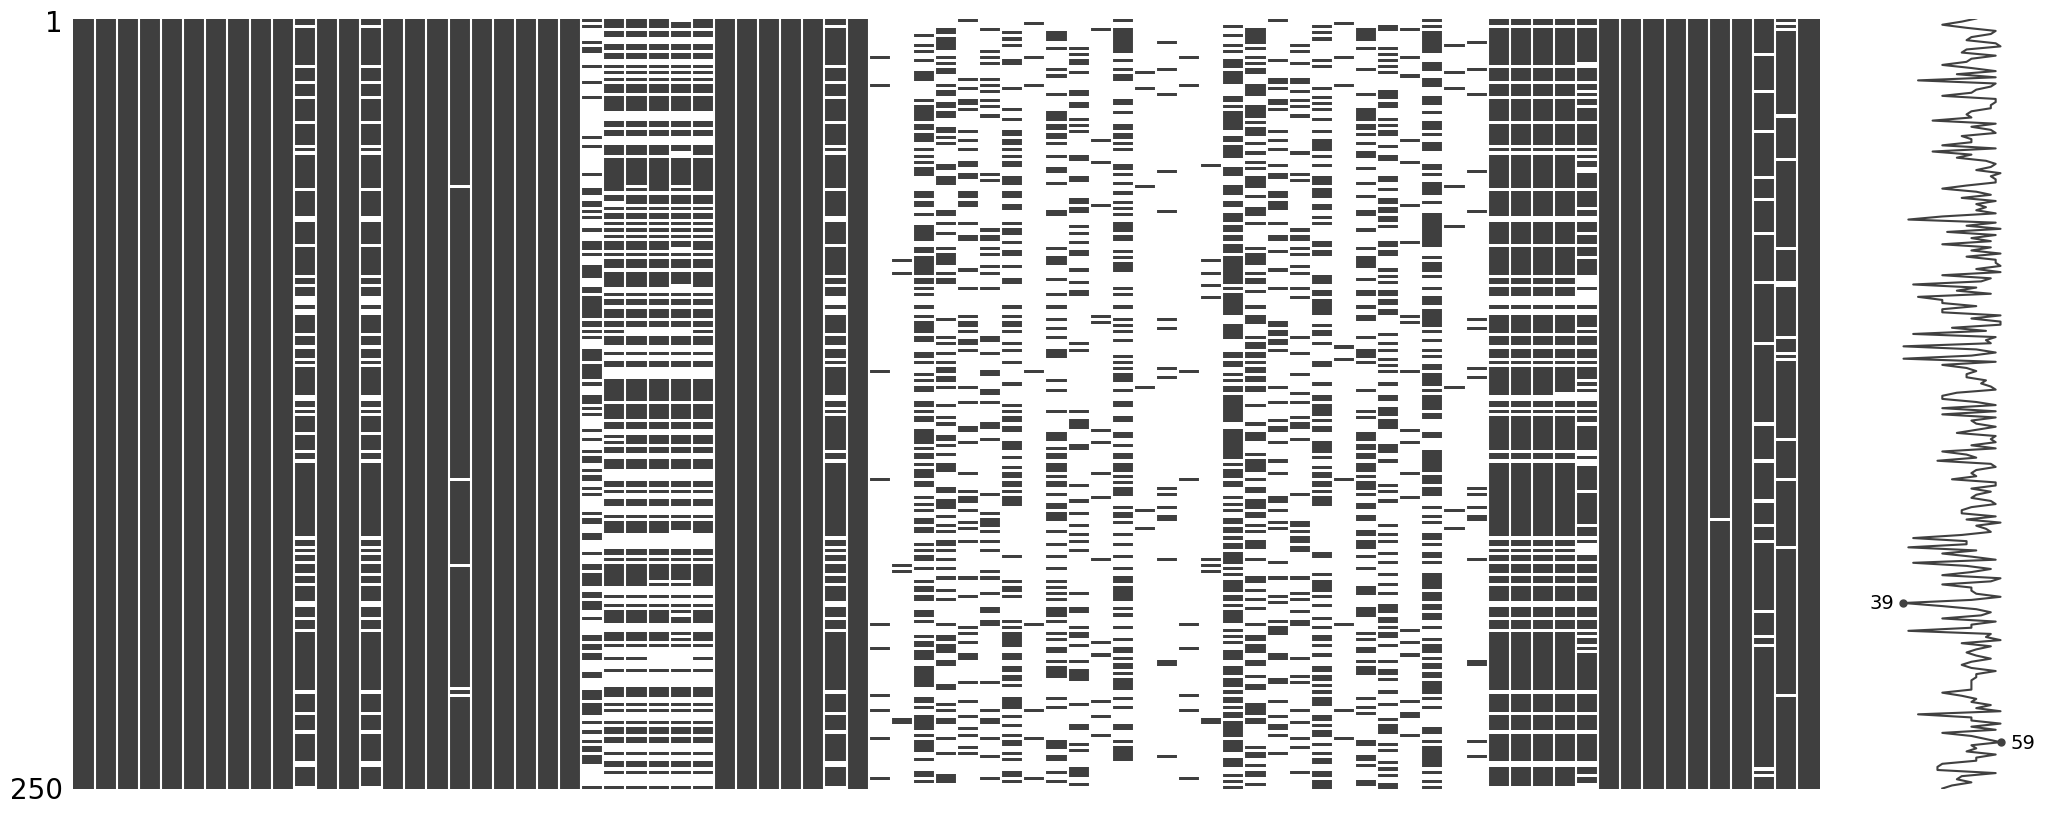

In [242]:
msno.matrix(extract_data.sample(250))

In [243]:
extract_data = extract_data.fillna('0')  #fill some missing causes data with 0

<AxesSubplot: >

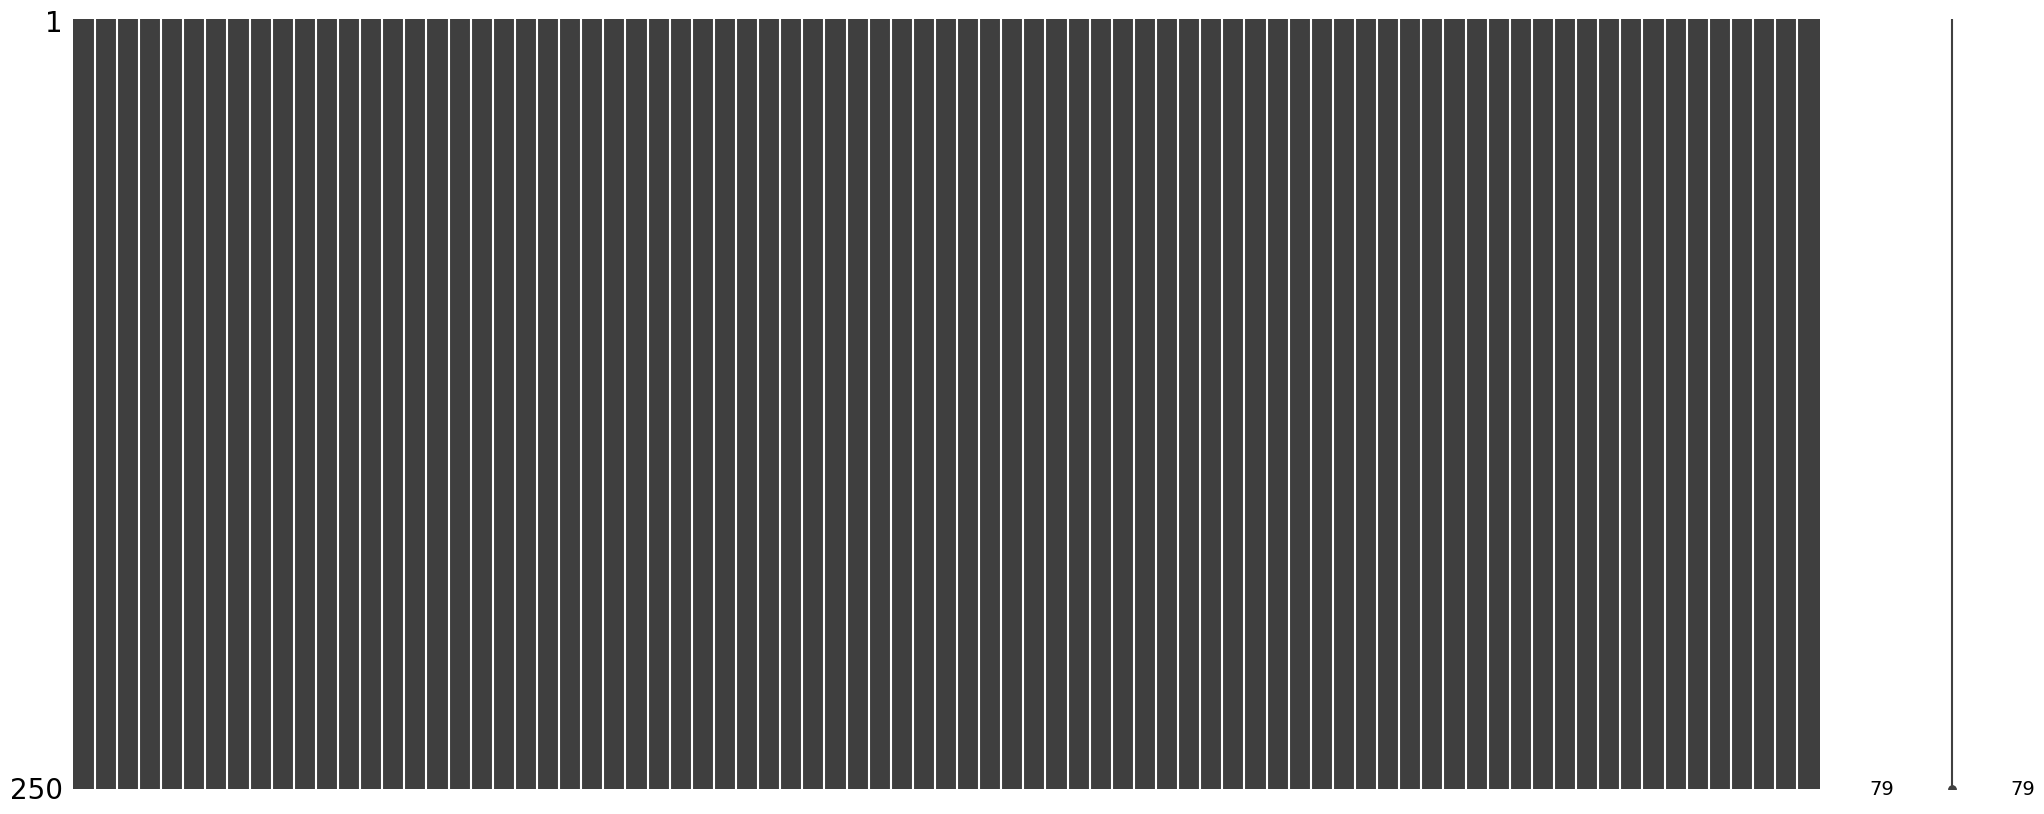

In [244]:
msno.matrix(extract_data.sample(250))

In [245]:

Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

10139


In [246]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10139 entries, 0 to 10138
Data columns (total 79 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Campaign_Id                                                                    10139 non-null  int64 
 1   Campaign_Title_x                                                               10139 non-null  object
 2   Receiving_NPO_Name                                                             10139 non-null  object
 3   Receiving_NPO_Id                                                               10139 non-null  int64 
 4   NPO_Status                                                                     10139 non-null  bool  
 5   Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month  10139 non-null  int64 
 6   Public_Campaign_Access        

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [247]:
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors']) 
extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount']) 

In [248]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name', 'Receiving_NPO_Id', 'NPO_Status', 'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount', 'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community', 'Org_Cause_Disability', 'Org

In [249]:
extract_data['Creator_Type'].unique()

array(['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY',
       'CORPORATE', 'GOVERNMENT', 'SCHOOL'], dtype=object)

In [250]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0
Creator_type = ['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY', 'CORPORATE', 'GOVERNMENT', 'SCHOOL']
Sector = ['Social and Welfare', 'Others', 'Health', 'Arts and Heritage', 'Sports', 'Education', 'Religious', 'Community']
extract_data['Sector_type'] = 0
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual_Donation_Amount'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO_Ipc_Status_For_Tax_Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO_Ipc_Status_For_Tax_Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO_Ipc_Status_For_Tax_Deductibility'] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[0]:
        extract_data['Creator_Type'].iloc[j] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[1]:
        extract_data['Creator_Type'].iloc[j] = 1
    if extract_data['Creator_Type'].iloc[j] == Creator_type[2]:
        extract_data['Creator_Type'].iloc[j] = 2
    if extract_data['Creator_Type'].iloc[j] == Creator_type[3]:
        extract_data['Creator_Type'].iloc[j] = 3
    if extract_data['Creator_Type'].iloc[j] == Creator_type[4]:
        extract_data['Creator_Type'].iloc[j] = 4
    if extract_data['Creator_Type'].iloc[j] == Creator_type[5]:
        extract_data['Creator_Type'].iloc[j] = 5
    if extract_data['Creator_Type'].iloc[j] == Creator_type[6]:
        extract_data['Creator_Type'].iloc[j] = 6
    if extract_data['Creator_Type'].iloc[j] == Creator_type[7]:
        extract_data['Creator_Type'].iloc[j] = 7

    if extract_data['Sector'].iloc[j] == Sector[0]:
        extract_data['Sector_type'].iloc[j] = 0
    if extract_data['Sector'].iloc[j] == Sector[1]:
        extract_data['Sector_type'].iloc[j] = 1
    if extract_data['Sector'].iloc[j] == Sector[2]:
        extract_data['Sector_type'].iloc[j] = 2
    if extract_data['Sector'].iloc[j] == Sector[3]:
        extract_data['Sector_type'].iloc[j] = 3
    if extract_data['Sector'].iloc[j] == Sector[4]:
        extract_data['Sector_type'].iloc[j] = 4
    if extract_data['Sector'].iloc[j] == Sector[5]:
        extract_data['Sector_type'].iloc[j] = 5
    if extract_data['Sector'].iloc[j] == Sector[6]:
        extract_data['Sector_type'].iloc[j] = 6
    if extract_data['Sector'].iloc[j] == Sector[7]:
        extract_data['Sector_type'].iloc[j] = 7

    
print("Number of deductibility:", num_deductibility)

Number of deductibility: 9633


# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [251]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social_Service',
       'Org_Cause_Sports', 'Org_Cause_Women_&_Girls',
       ]
Cam_causes = ['Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_&_Heritage',
       'Cam_Cause_Children_&_Youth', 'Cam_Cause_Community',
       'Cam_Cause_Disability', 'Cam_Cause_Education', 'Cam_Cause_Elderly',
       'Cam_Cause_Environment', 'Cam_Cause_Families', 'Cam_Cause_Health',
       'Cam_Cause_Humanitarian', 'Cam_Cause_Social_Service',
       'Cam_Cause_Sports', 'Cam_Cause_Women_&_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [252]:
Image_Number = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_Number"] =  Image_Number(extract_data["Campaign_Image1_Id"],extract_data["Campaign_Image2_Id"],extract_data["Campaign_Image3_Id"],extract_data["Campaign_Image4_Id"],extract_data["Campaign_Image5_Id"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [253]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)

extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])
extract_data["Campaign_Video"].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [254]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_Duration'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_Duration'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'Campaign_Duration'] < 0:
#        extract_data.loc[i, 'Campaign_Duration'] = 0
    i += 1

In [255]:
# extract_data.to_csv('before_clean.csv')

In [256]:
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']


extract_data['Campaign_Start_Year_category'] = 0
for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[0]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 0
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[1]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 1
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[2]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 2
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[3]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 3
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[4]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 4
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[5]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 5


# Clean data

# <font size =6 face = 'time new roman' >Here delete the rows where Campaign_Duration less than 1</font>

In [257]:

num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_Duration'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]


Total delete numbers where duraiton less than 0: 97


In [258]:
Impact_msg_list = ['Impact_Message_1','Impact_Message_2','Impact_Message_3','Impact_Message_4','Impact_Message_5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [259]:
# Nunber of description words
extract_data['Number_of_words_describing_campaign'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    
    extract_data.loc[index, 'Number_of_words_describing_campaign'] = sentence_length( str(extract_data.loc[index, 'Description_of_Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description_of_NPO']))


# Delete the lines where NPO is blank

In [260]:

num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1 and   extract_data.loc[index, 'Actual_Donation_Amount']<=0 :
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  
Total_Rows = extract_data.shape[0]


Total delete numbers where Num_desc_NPO less than 1: 1987


# Re-consider description contents again

In [261]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if ("TEST" in str(extract_data.loc[index, 'Description_of_Campaign']).upper() or "TEST" in str(extract_data.loc[index, 'Campaign_Title_x']).upper()) and extract_data.loc[index, 'Number_of_words_describing_campaign']< 10:
        extract_data.drop(index, inplace=True)
        num2 += 1
'''
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Number_of_words_describing_campaign']< 5:
        extract_data.drop(index, inplace=True)
        num2 += 1
'''
print("Total delete numbers:", num2)  


Total delete numbers: 0


In [262]:
# extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

# Average donation per donator

In [263]:
# extract_data['Avg_donation_amount'] =  extract_data['Actual_Donation_Amount']/extract_data['Distinct_Donors']

# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [264]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] <= 0 and extract_data.loc[index,'Distinct_Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 58


# Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106

In [265]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] == 984 or extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] == 106:
    #if extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] > 16:
        extract_data.drop(index, inplace=True)
        num += 1

print("Total delete numbers where Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106:", num)  
Total_Rows = extract_data.shape[0]


Total delete numbers where Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106: 37


# Remove all active campaigns. The last campaign should be as of END OCT 2022

In [266]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_Status'].upper() != "ENDED" :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Remove all active campaigns. The last campaign should be as of END OCT 2022:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Remove all active campaigns. The last campaign should be as of END OCT 2022: 612


# Remove 40,000, 56,000, 80,000, and 100,000

In [267]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Custom_Amount_4'] >=40000 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Remove 40,000, 56,000, 80,000, and 100,000:", num)  
Total_Rows = extract_data.shape[0]

Remove 40,000, 56,000, 80,000, and 100,000: 8


In [268]:
extract_data.shape

(7340, 94)

# Add new column call Campaign Funds Raised

In [269]:
extract_data.columns[-50:]

Index(['Org_Cause_Families', 'Org_Cause_Health', 'Org_Cause_Humanitarian', 'Org_Cause_Social_Service', 'Org_Cause_Sports', 'Org_Cause_Women_&_Girls', 'Cam_Cause_Animal_Welfare',
       'Cam_Cause_Arts_&_Heritage', 'Cam_Cause_Children_&_Youth', 'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education', 'Cam_Cause_Elderly', 'Cam_Cause_Environment',
       'Cam_Cause_Families', 'Cam_Cause_Health', 'Cam_Cause_Humanitarian', 'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_&_Girls', 'Pub_Enquiry_Person', 'Pub_Enquiry_Contact',
       'Pub_Enquiry_Email', 'Web_URL', 'Facebook_Link', 'Org_causes', 'Cam_causes', 'S/N', 'Type', 'UEN', 'IPC_Period', 'Sector', 'Classification', 'Activities', 'Scale_type', 'Donation_per_donor',
       'Sector_type', 'Campaign_Image_Number', 'Campaign_Start_Day', 'Campaign_Start_Month', 'Campaign_Start_Year', 'Campaign_End_Day', 'Campaign_End_Month', 'Campaign_End_Year', 'Campaign_Start',
       'Campaign_End', 'Campaign_Duration', 'Campa

In [270]:
extract_data['Campaign_Funds_Raised'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount']>0 :
        extract_data.loc[index,'Campaign_Funds_Raised'] = 1
    if extract_data.loc[index,'Scale_type'] == 50000:
        extract_data.loc[index,'Scale_type'] = 0
    if extract_data.loc[index,'Scale_type'] == 200000:
        extract_data.loc[index,'Scale_type'] = 1
    if extract_data.loc[index,'Scale_type'] == 500000:
        extract_data.loc[index,'Scale_type'] = 2
    if extract_data.loc[index,'Scale_type'] == 250000:
        extract_data.loc[index,'Scale_type'] = 3
    if extract_data.loc[index,'Scale_type'] == 1000000:
        extract_data.loc[index,'Scale_type'] = 4
    if extract_data.loc[index,'Scale_type'] == 5000000:
        extract_data.loc[index,'Scale_type'] = 5
    if extract_data.loc[index,'Scale_type'] == 20000000:
        extract_data.loc[index,'Scale_type'] = 6
    if extract_data.loc[index,'Scale_type'] == 10000000:
        extract_data.loc[index,'Scale_type'] = 7   


In [271]:
extract_data.shape

(7340, 95)

In [272]:
#extract_data.to_csv("Cleaned_data.csv")

In [273]:
extract_data['Avg_custom_amount'] = (extract_data['Custom_Amount_1']+extract_data['Custom_Amount_2'] +extract_data['Custom_Amount_3'] + extract_data['Custom_Amount_4'] )/4


# <font size =6 face = 'time new roman' >Polarity</font>

In [274]:
'''
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0


extract_data['Description_Campaign_polarity'] = 0
#extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
#Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
Impact_msg_list = ['Description_of_Campaign']
#Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg_polarity_list = ['Description_Campaign_polarity']
#Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        #extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
#extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
#extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]
'''

'\nextract_data[\'Msg1_polarity\'] = 0\nextract_data[\'Msg1_subjectivity\'] = 0\nextract_data[\'Msg2_polarity\'] = 0\nextract_data[\'Msg2_subjectivity\'] = 0\nextract_data[\'Msg3_polarity\'] = 0\nextract_data[\'Msg3_subjectivity\'] = 0\nextract_data[\'Msg4_polarity\'] = 0\nextract_data[\'Msg4_subjectivity\'] = 0\nextract_data[\'Msg5_polarity\'] = 0\nextract_data[\'Msg5_subjectivity\'] = 0\n\n\nextract_data[\'Description_Campaign_polarity\'] = 0\n#extract_data[\'Description_Campaign_subjectivity\'] = 0\n\nfrom textblob import TextBlob\n# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数\n# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的\n#Impact_msg_list = [\'Impact Message 1\',\'Impact Message 2\',\'Impact Message 3\',\'Impact Message 4\',\'Impact Message 5\',\'Description of Campaign\']\nImpact_msg_list = [\'Description_of_Campaign\']\n#Msg_polarity_list = [\'Msg1_polarity\',\'Msg2_polarity\',\'Msg3_polarity\',\'Msg4_polarity\',\'Msg5_polarity\',\'Description_Campaign_polarity\']\nMsg_

# Future tense

In [275]:
# It is accomplished mainly by using word_tokenize package.
# import the releated package
from nltk import word_tokenize, pos_tag
# This package is used for spliting the sentence
# Here is how it works
sentence = "Your donation will testament that suicide prevention is everyone's business."
tokens = word_tokenize(sentence)
print(tokens)
# ['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
# Tag different compoments in the sentence
print(pos_tag(tokens))
'''
Here is the result after taging
[('Your', 'PRP$'),
 ('donation', 'NN'),
 ('will', 'MD'),
 ('testament', 'VB'),
 ('that', 'IN'),
 ('suicide', 'JJ'),
 ('prevention', 'NN'),
 ('is', 'VBZ'),
 ('everyone', 'NN'),
 ("'s", 'POS'),
 ('business', 'NN'),
 ('.', '.')]
'''
# MD modal could, will
# So we can use the number of MD tags to judge the future tense.
# Another example   can.may.might.could.should.would.will.must.
sentence2 = 'Your donation will testament that suicide prevention is everyone business.Your $500 donation (5 tins) can contribute towards \
providing a month of meals for a child in HomeSweetHome@Admiralty (HSH).'
text = word_tokenize(sentence2)
tagged = pos_tag(text)

print( ([word for word in tagged if word[1] == "MD"]))
# The result is 2


['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
[('Your', 'PRP$'), ('donation', 'NN'), ('will', 'MD'), ('testament', 'VB'), ('that', 'IN'), ('suicide', 'JJ'), ('prevention', 'NN'), ('is', 'VBZ'), ('everyone', 'NN'), ("'s", 'POS'), ('business', 'NN'), ('.', '.')]
[('will', 'MD'), ('can', 'MD')]


In [276]:
len([word for word in tagged if word[1] == "VB"])

2

In [277]:
MD_list = []
test = [word for word in tagged if word[1] == "MD"]
for ite in test:
    if ite[0] not in MD_list:
        MD_list.append(ite[0])
print(MD_list)

['will', 'can']


In [278]:
from nltk import word_tokenize, pos_tag
MD_list = []
def determine_tense_input(sentence):
    text = word_tokenize(sentence)
    tagged = pos_tag(text)

    tense = {}
    
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    test = [word for word in tagged if word[1] == "MD"]
    for ite in test:
        if ite[0] not in MD_list:
            MD_list.append(ite[0])

    return(tense)

In [279]:
MD_list



[]

In [280]:
# Nunber of description words
extract_data['Future_tense'] = 0
extract_data['Future_tense_percentage'] = 0
#extract_data['Num_desc_NPO'] = 0

for index, row in extract_data.iterrows():
    Impact_msg_str = ''
    Impact_msg_str += extract_data.loc[index,'Impact_Message_1']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_2']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_3']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_4']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_5']
    extract_data.loc[index,'Future_tense'] = determine_tense_input(Impact_msg_str)['future']
    extract_data.loc[index,'Future_tense_percentage'] = determine_tense_input(Impact_msg_str)['future']/sentence_length(Impact_msg_str)

In [281]:
extract_data['Future_tense_percentage'].max()

0.12903225806451613

In [282]:
extract_data['Future_tense_percentage'].min()

0.0

# Convert to numeric

In [283]:
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',  'Cam_causes', 'Description_Campaign_polarity',"Creator_Type","Campaign_Start_Year", 'Campaign Promise']

extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount'])
extract_data['Campaign_Goal'] = pd.to_numeric( extract_data['Campaign_Goal'])
extract_data['NPO_Ipc_Status_For_Tax_Deductibility'] = pd.to_numeric( extract_data['NPO_Ipc_Status_For_Tax_Deductibility'])
extract_data['Campaign_Duration'] = pd.to_numeric( extract_data['Campaign_Duration'])
extract_data['Campaign_Video'] = pd.to_numeric( extract_data['Campaign_Video'])
extract_data['Campaign_Image_Number'] = pd.to_numeric( extract_data['Campaign_Image_Number'])
extract_data['Number_of_words_describing_campaign'] = pd.to_numeric( extract_data['Number_of_words_describing_campaign'])

extract_data['Cam_causes'] = pd.to_numeric( extract_data['Cam_causes'])
extract_data['Creator_Type'] = pd.to_numeric(extract_data['Creator_Type'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO_Ipc_Status_For_Tax_Deductibility'] = pd.to_numeric(extract_data['NPO_Ipc_Status_For_Tax_Deductibility'])
extract_data['Campaign_Video'] = pd.to_numeric(extract_data['Campaign_Video'])
extract_data['Campaign_Start_Year'] = pd.to_numeric(extract_data['Campaign_Start_Year'])
#extract_data['Campaign Promise'] = pd.to_numeric(extract_data['Campaign Promise'])

extract_data["Distinct_Donors"] = pd.to_numeric(extract_data["Distinct_Donors"])
#extract_data['Sector'] = pd.to_numeric( extract_data['Sector'])
extract_data['Sector_type'] = pd.to_numeric(extract_data['Sector_type'] )
extract_data['Campaign_Video'].unique()

array([1, 0])

# Log Transformation

In [284]:
extract_data = extract_data.rename(columns={'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month':'Campaign_frequency'})

In [285]:
extract_data['Campaign_frequency'] =  pd.to_numeric(extract_data['Campaign_frequency'])

extract_data['Campaign_Start_Year'] =  pd.to_numeric(extract_data['Campaign_Start_Year'])

In [286]:
extract_data['Log_Actual_Donation_Amount']=0
extract_data['Log_Distinct_Donors'] = 0
extract_data['Log_Campaign_Goal'] = 0
extract_data['Log_Campaign_Duration'] = 0
extract_data['Log_avg_custom_amount'] = 0
extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = 0
extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = 0
extract_data['Campaign_success'] = 0
extract_data['Log_campaign_success'] = 0
eps = 1
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] > 0:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(extract_data.loc[index,'Actual_Donation_Amount'])
    else:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(eps)

    if extract_data.loc[index,'Distinct_Donors'] > 0:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(extract_data.loc[index,'Distinct_Donors'])
    else:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Goal'] > 0:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(extract_data.loc[index,'Campaign_Goal'])
    else:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Duration'] > 0:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(extract_data.loc[index,'Campaign_Duration'])
    else:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(eps)

    if extract_data.loc[index,'Avg_custom_amount'] > 0:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(extract_data.loc[index,'Avg_custom_amount'])
    else:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Goal'] > 0 and extract_data.loc[index,'Actual_Donation_Amount'] > 0: 
        if extract_data.loc[index,'Campaign_Goal'] <= extract_data.loc[index,'Actual_Donation_Amount']:
            #extract_data.loc[index,'Campaign_success'] =1
            #extract_data.loc[index,'Log_campaign_success'] = 1
            extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal']
            extract_data.loc[index,'Log_campaign_success'] = np.log( extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal'])
        else:
            extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal']
            extract_data.loc[index,'Log_campaign_success'] = np.log( extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal'])
        
    else:
        extract_data.loc[index,'Log_campaign_success'] = np.log(eps)

    if extract_data.loc[index,'Org_causes'] > 0:
        extract_data.loc[index,'Log_Org_causes'] = np.log(extract_data.loc[index,'Org_causes'])
    else:
        extract_data.loc[index,'Log_Org_causes'] = np.log(eps)

    extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Future_tense_percentage_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense_percentage'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = extract_data.loc[index, 'Campaign_frequency'] * extract_data.loc[index,'Log_avg_custom_amount']
    extract_data.loc[index,'Future_tense_percentage_X_Log_avg_custom_amount'] = extract_data.loc[index, 'Future_tense_percentage'] * extract_data.loc[index,'Log_avg_custom_amount']
    extract_data.loc[index,'Future_tense_percentage_X_Avg_custom_amount'] = extract_data.loc[index, 'Future_tense_percentage'] * extract_data.loc[index,'Avg_custom_amount']



In [287]:
extract_data["Campaign_success"] = pd.to_numeric(extract_data["Campaign_success"])
extract_data["Log_Distinct_Donors"] = pd.to_numeric(extract_data["Log_Distinct_Donors"])
extract_data['Campaign_success'].unique()

array([0.11122   , 0.47916   , 1.175     , ..., 0.29099333, 0.03846154,
       0.64464062])

# Delete unused columns

In [288]:
extract_data['Log_Actual_Donation_Amount_round'] = round(extract_data['Log_Actual_Donation_Amount'])
extract_data['Log_Actual_Donation_Amount_round'].value_counts()

8.0     1456
9.0     1375
7.0     1359
6.0      929
10.0     762
5.0      562
11.0     318
4.0      251
3.0      124
12.0      91
2.0       87
13.0      21
14.0       5
Name: Log_Actual_Donation_Amount_round, dtype: int64

In [289]:
unused_columns = ['Donation_per_donor', 'Campaign_Start_Day','Campaign_Start_Month',
       'Campaign_End_Day', 'Campaign_End_Month', 'Campaign_End_Year',
       'Campaign_Start', 'Campaign_End', 'Avg_custom_amount', 
       'Future_tense',
       'Log_Distinct_Donors', 'Log_Campaign_Duration',
       'Future_tense_X_Campaign_frequency',
       'Campaign_frequency_X_Log_avg_custom_amount', 'Campaign_success',
       'Log_campaign_success', 'Log_Org_causes',
       'Future_tense_percentage_X_Campaign_frequency',
       'Log_Actual_Donation_Amount_round']
# extract_data = extract_data.drop(unused_columns, axis = 1)

In [290]:
# extract_data.to_csv("16-Jun-dataset.csv")

In [291]:
extract_data.shape

(7340, 112)

In [292]:
#extract_data.to_csv("Cleaned_data2.csv")


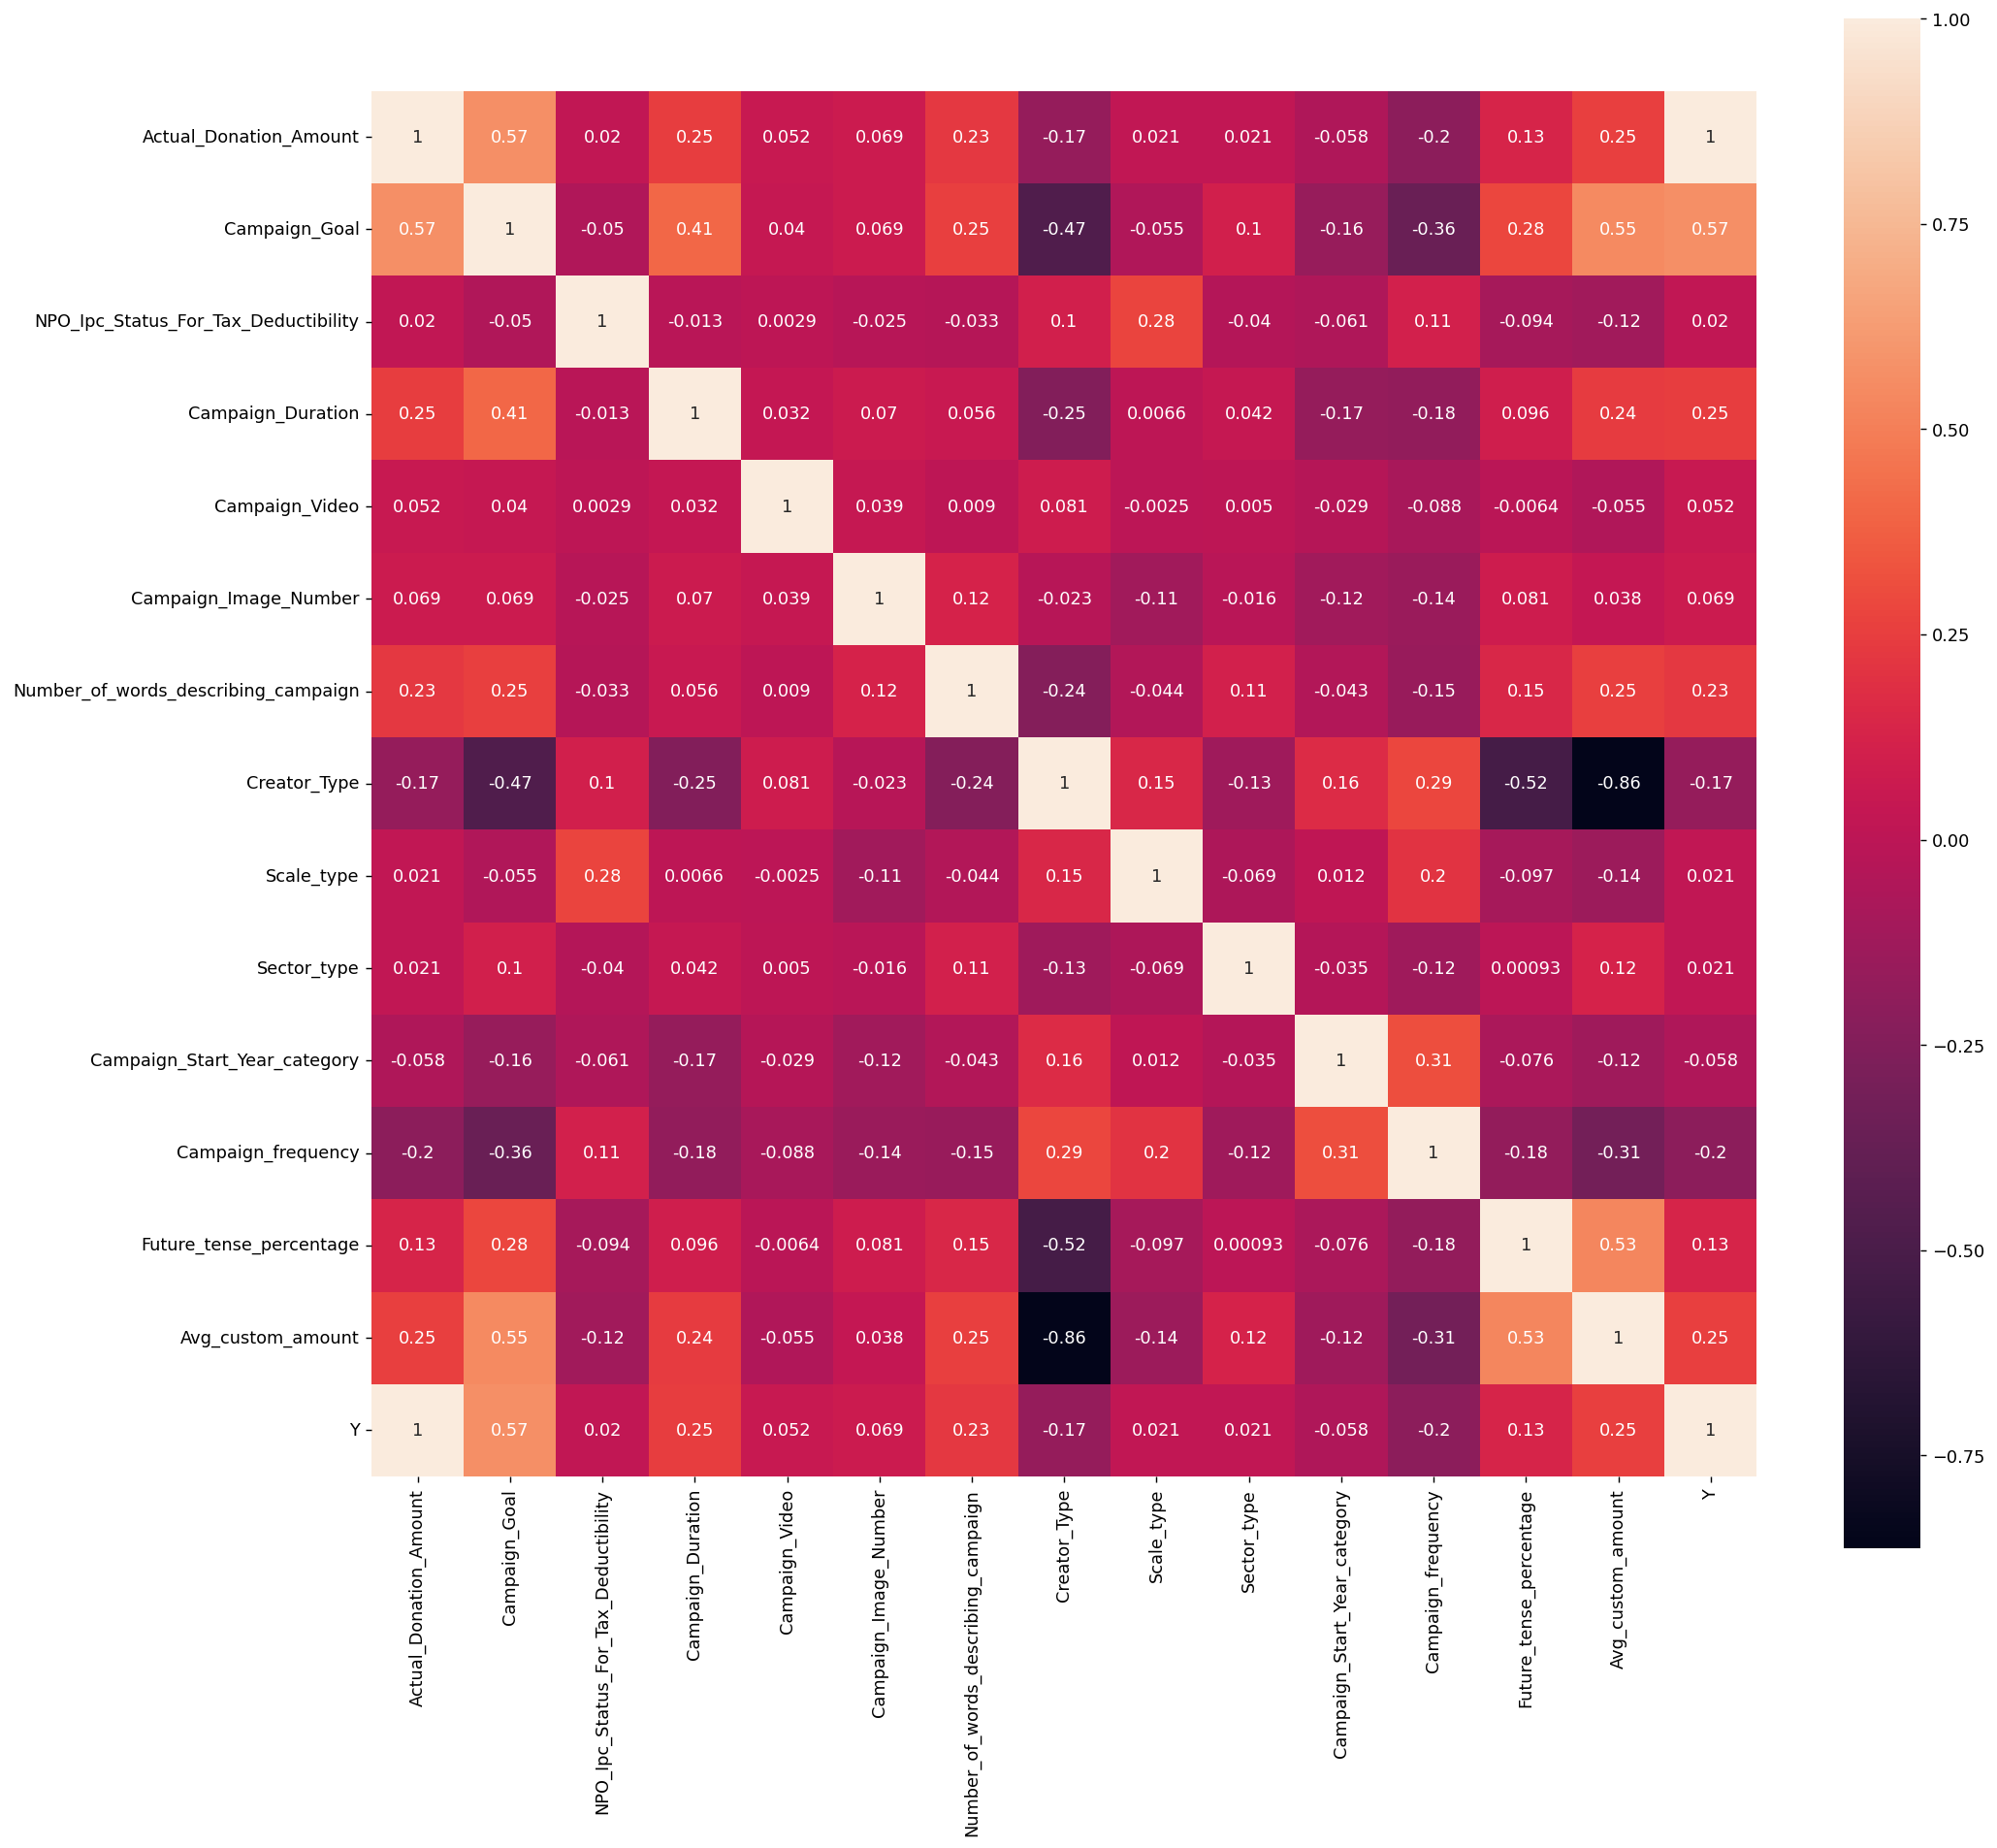

In [293]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                     "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category", "Campaign_frequency",
                     "Future_tense_percentage", "Avg_custom_amount"]

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

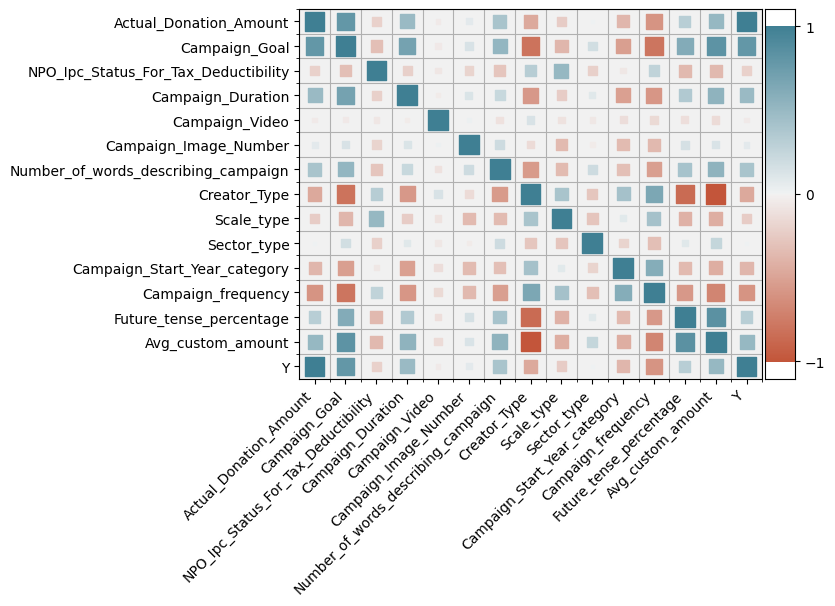

In [294]:
# pip install heatmapz

from heatmap import heatmap, corrplot

corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Actual_Donation_Amount + Campaign Promise

Scatter plot 2
Actual_Donation_Amount + Campaign Promise

Scatter plot 3
Number of Distinct_Donors   + Campaign Promise

Scatter plot 4 
Number of Distinct_Donors  + Campaign Promise

In [295]:
'''
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(223)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.show()
'''

'\nplt.figure(figsize=(15,15))\n\nplt.subplot(221)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(222)\nplt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(223)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(224)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.show()\n'

# Historgram 

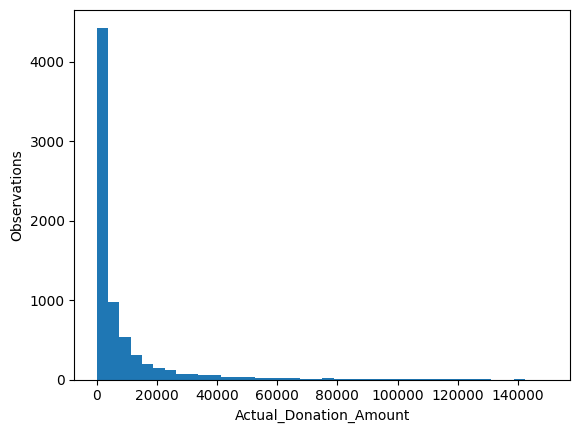

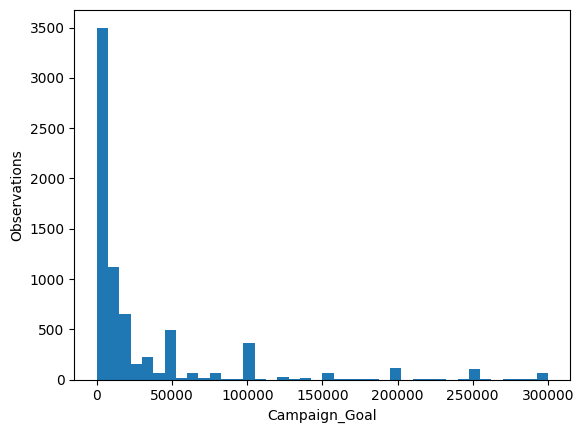

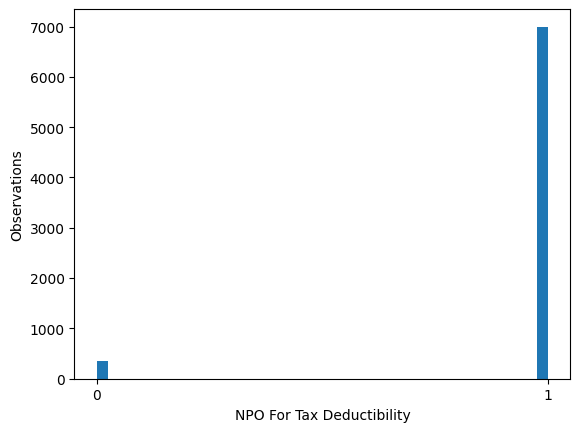

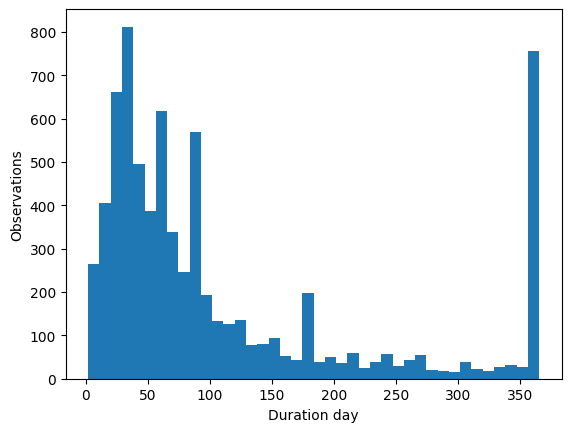

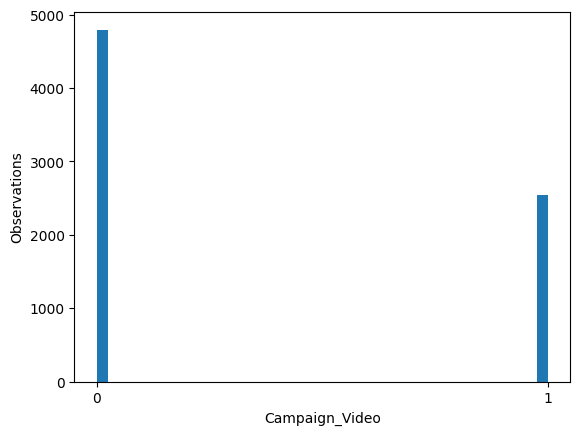

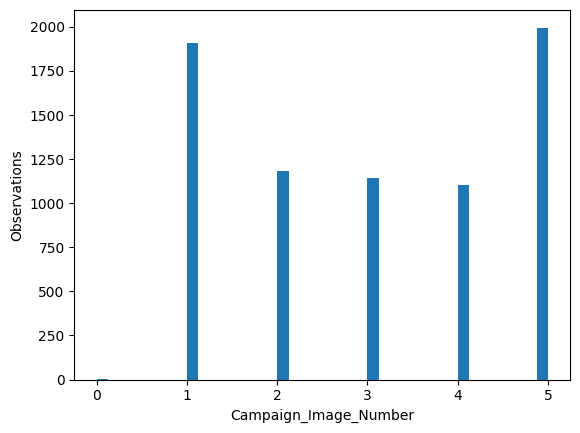

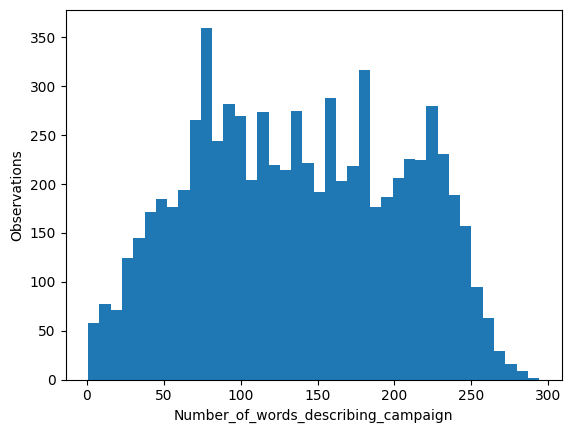

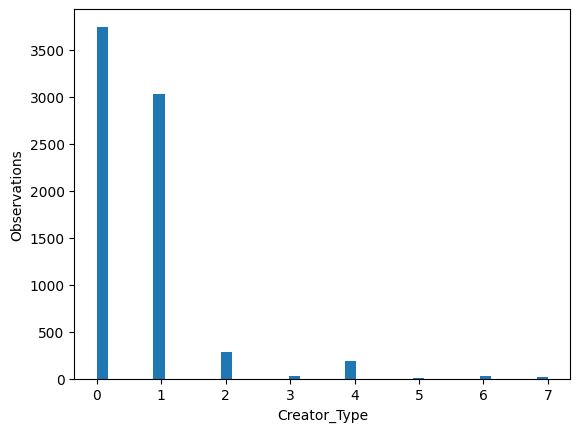

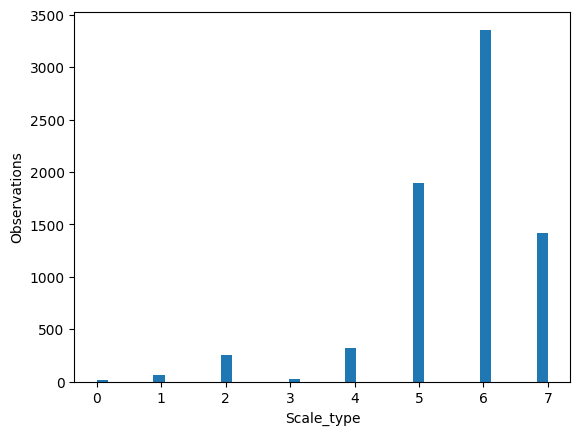

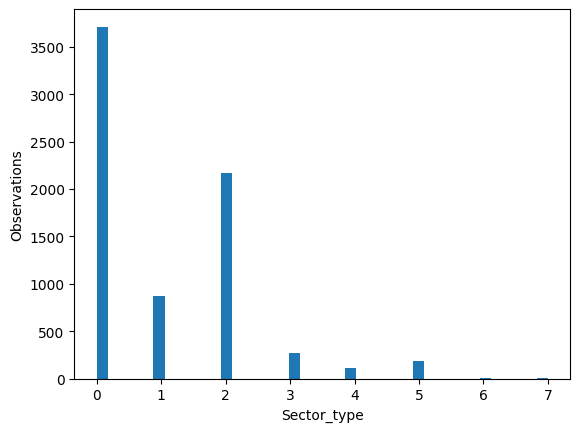

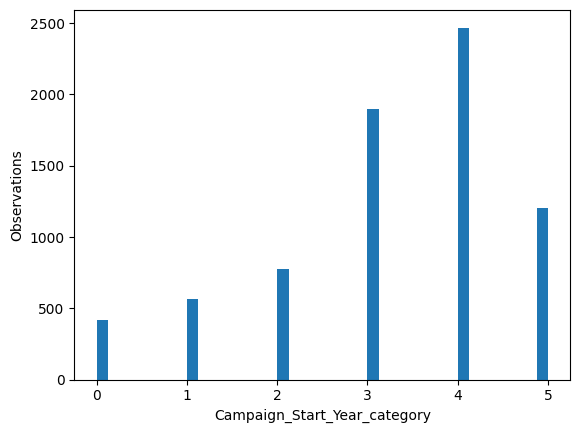

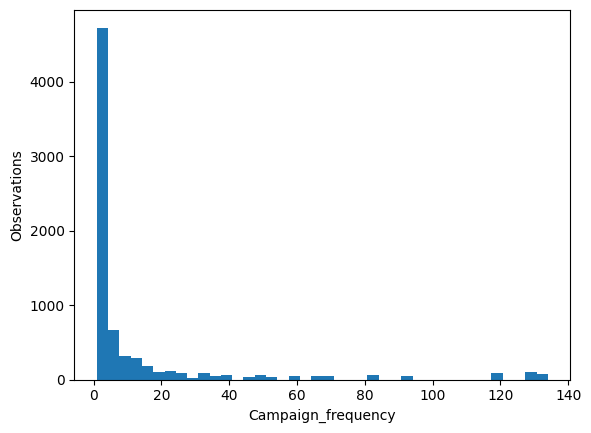

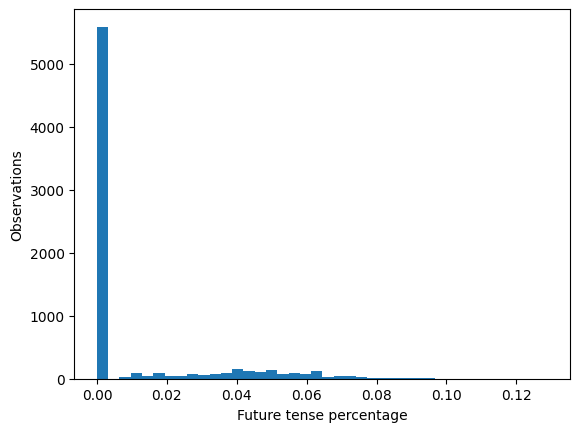

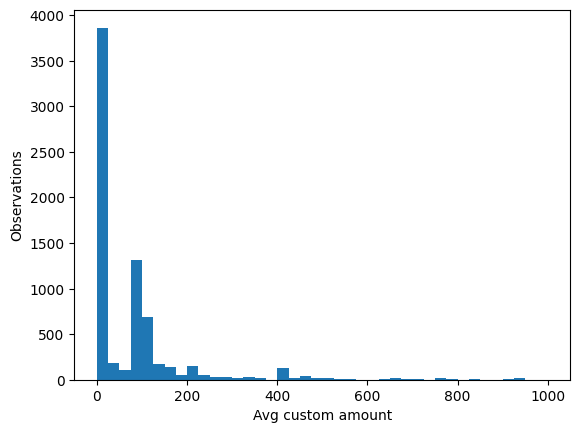

In [296]:

#plt.figure(figsize=(20,20))
#plt.subplot(441)

'''
for i in numeric_features1:
    plt.hist(extract_data[i], bins=40)
    plt.xlabel(str(i)); plt.ylabel('Observations')
    plt.show()
'''
plt.hist(extract_data['Actual_Donation_Amount'], bins=40, range=(0,150000))
plt.xlabel('Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign_Goal'], bins=40, range=(0,300000))
plt.xlabel('Campaign_Goal'); plt.ylabel('Observations')
plt.show()

#plt.subplot(443)
plt.hist(extract_data['NPO_Ipc_Status_For_Tax_Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Observations')
x_major_locator=MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()
#plt.subplot(444)
plt.hist(extract_data['Campaign_Duration'], bins=40)
plt.xlabel('Duration day'); plt.ylabel('Observations')
plt.show()
#plt.subplot(445)
plt.hist(extract_data['Campaign_Video'], bins=40)
plt.xlabel('Campaign_Video'); plt.ylabel('Observations')
x_major_locator=MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

#plt.subplot(446)
plt.hist(extract_data['Campaign_Image_Number'], bins=40)
plt.xlabel('Campaign_Image_Number'); plt.ylabel('Observations')
plt.show()

#plt.subplot(447)
plt.hist(extract_data['Number_of_words_describing_campaign'], bins=40)
plt.xlabel('Number_of_words_describing_campaign'); plt.ylabel('Observations')
plt.show()


#plt.subplot(4,4,10)
plt.hist(extract_data['Creator_Type'], bins=40)
plt.xlabel('Creator_Type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,10)
plt.hist(extract_data['Scale_type'], bins=40)
plt.xlabel('Scale_type'); plt.ylabel('Observations')
plt.show()


#plt.subplot(4,4,10)
plt.hist(extract_data['Sector_type'], bins=40)
plt.xlabel('Sector_type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year_category'], bins=40)
plt.xlabel('Campaign_Start_Year_category'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,12)
plt.hist(extract_data['Campaign_frequency'], bins=40)
plt.xlabel('Campaign_frequency'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,13)
plt.hist(extract_data['Future_tense_percentage'], bins=40)
plt.xlabel('Future tense percentage'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Avg_custom_amount'], bins=40, range=(0,1000))
plt.xlabel('Avg custom amount'); plt.ylabel('Observations')
plt.show()



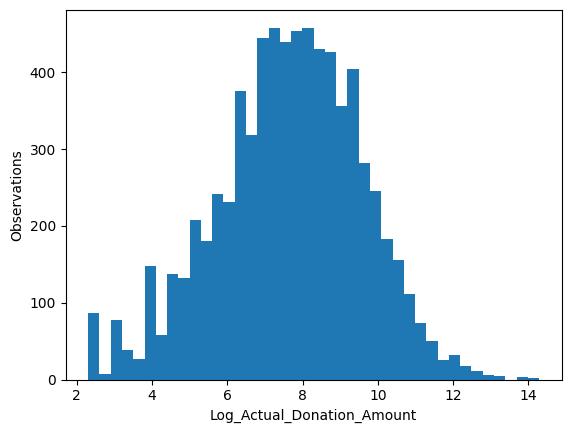

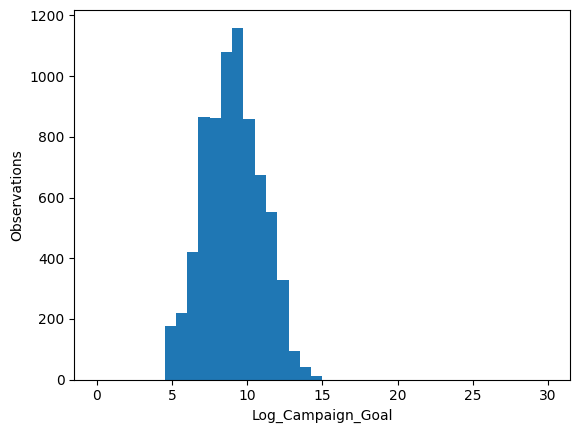

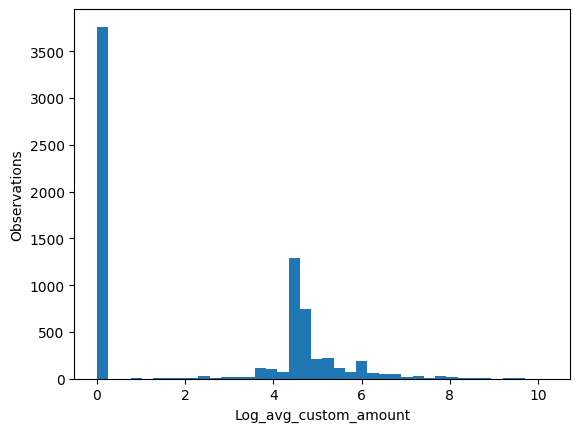

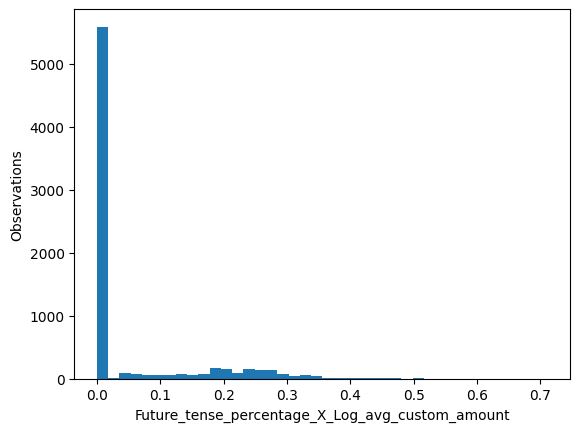

In [297]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Log_Actual_Donation_Amount'], bins=40)
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Log_Campaign_Goal'], bins=40, range=(0,30))
plt.xlabel('Log_Campaign_Goal'); plt.ylabel('Observations')
plt.show()

#plt.subplot(445)
plt.hist(extract_data['Log_avg_custom_amount'], bins=40)
plt.xlabel('Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


#plt.subplot(449)
plt.hist(extract_data['Future_tense_percentage_X_Log_avg_custom_amount'], bins=40)
plt.xlabel('Future_tense_percentage_X_Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [301]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [302]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [303]:

s = extract_data['Actual_Donation_Amount']
print(s.skew())
print(s.kurt())

18.76533114511192
515.0851788073364


# To see how log Actual funds raised changes for  different levels of future tense percentage and log avg custom amount

In [304]:
extract_data['Log_future_tense_percentage_level'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Future_tense_percentage'] < 0.08043 and extract_data.loc[index,'Future_tense_percentage'] > 0:
        extract_data.loc[index,'Log_future_tense_percentage_level'] = 0.04
    if extract_data.loc[index,'Future_tense_percentage'] >= 0.08043:
        extract_data.loc[index,'Log_future_tense_percentage_level'] = 0.1

In [305]:
extract_data['Log_Future_tense_percentage'] = np.log(extract_data['Future_tense_percentage'] + 1)
extract_data['Log_avg_custom_amount'] = np.log(extract_data['Avg_custom_amount'] + 1)
extract_data['Log_future_tense_percentage_X_Log_avg_custom_amount'] = extract_data['Log_Future_tense_percentage'] * extract_data['Log_avg_custom_amount']


In [306]:
(extract_data['Log_Future_tense_percentage'].value_counts())

0.000000    5594
0.048790      76
0.059898      55
0.038221      47
0.054067      43
0.068993      34
0.042560      25
0.040822      23
0.028573      20
0.044060      19
0.035718      18
0.059719      18
0.060625      17
0.018019      17
0.058269      16
0.057820      16
0.047628      16
0.045462      16
0.041243      15
0.044452      15
0.057158      15
0.035091      15
0.033902      15
0.046520      14
0.040410      13
0.061558      13
0.039221      13
0.025975      13
0.054808      12
0.043803      12
0.016807      12
0.031749      12
0.065597      12
0.046957      11
0.017094      11
0.065958      11
0.009756      11
0.036368      11
0.064539      10
0.073025      10
0.044951      10
0.044851       9
0.032261       9
0.061369       9
0.053489       9
0.029853       9
0.053110       9
0.040005       9
0.066691       9
0.038466       9
0.010152       9
0.021506       9
0.053346       9
0.062914       8
0.016261       8
0.058496       8
0.050010       8
0.051293       8
0.030772      

In [307]:
for title in numeric_features2:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    
    print( title, "skew:" ,extract_data[title].skew())
    print( title, "kurt:" ,extract_data[title].kurt())
    
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))

Log_Actual_Donation_Amount Median: 7.629439344937267
Log_Actual_Donation_Amount Std: 1.9559319987280748
Log_Actual_Donation_Amount skew: -0.2695885136210425
Log_Actual_Donation_Amount kurt: 0.026774017772850822
Log_Actual_Donation_Amount Min: 2.302585092994046
Log_Actual_Donation_Amount Max: 14.287354991888984
Log_Campaign_Goal Median: 8.96277462340678
Log_Campaign_Goal Std: 1.943153656723777
Log_Campaign_Goal skew: 0.042169814867144516
Log_Campaign_Goal kurt: -0.4164323123458229
Log_Campaign_Goal Min: 4.605170185988092
Log_Campaign_Goal Max: 14.508657738524219
NPO_Ipc_Status_For_Tax_Deductibility Median: 0.953133514986376
NPO_Ipc_Status_For_Tax_Deductibility Std: 0.21135282727252958
NPO_Ipc_Status_For_Tax_Deductibility skew: -4.288810774282283
NPO_Ipc_Status_For_Tax_Deductibility kurt: 16.398366003129844
NPO_Ipc_Status_For_Tax_Deductibility Min: 0
NPO_Ipc_Status_For_Tax_Deductibility Max: 1
Campaign_Duration Median: 111.71362397820164
Campaign_Duration Std: 109.63738724026686
Campaign

In [308]:
extract_data['Log_Future_tense_percentage'].unique()

array([0.01197619, 0.        , 0.0618754 , 0.08535985, 0.03704127,
       0.02298952, 0.09763847, 0.05635294, 0.02817088, 0.0529224 ,
       0.05236799, 0.05182507, 0.01015237, 0.05406722, 0.0104713 ,
       0.04301739, 0.04879016, 0.01307208, 0.08894749, 0.05971923,
       0.08701138, 0.06538276, 0.04762805, 0.0419642 , 0.05001042,
       0.04380262, 0.05195974, 0.05942342, 0.04959694, 0.06169357,
       0.05781957, 0.02739897, 0.03509132, 0.04396312, 0.02222314,
       0.02424361, 0.06453852, 0.02666825, 0.02197891, 0.02643326,
       0.00975617, 0.02777956, 0.01129956, 0.01834914, 0.03077166,
       0.06062462, 0.03953084, 0.05588046, 0.02871011, 0.02597549,
       0.0588405 , 0.0416727 , 0.03984591, 0.02898754, 0.01273903,
       0.03571808, 0.01418463, 0.06899287, 0.07755823, 0.0129034 ,
       0.05798726, 0.04652002, 0.05129329, 0.04598511, 0.05918887,
       0.02985296, 0.05849621, 0.04255961, 0.04445176, 0.07729167,
       0.04740224, 0.05715841, 0.05455898, 0.02715099, 0.01769

In [309]:
np.mean(extract_data['Log_Future_tense_percentage'])

0.010170470208412549

In [310]:
np.mean(extract_data['Log_Future_tense_percentage'].unique())

0.039563003250765096

In [311]:
np.max(extract_data['Log_Future_tense_percentage'])

0.12136085700426734

In [312]:
(0.03956+0.1213)/2

0.08043

In [313]:
interaction_data1 = extract_data[['Log_Future_tense_percentage', 'Log_avg_custom_amount', 'Log_Actual_Donation_Amount']]

In [314]:
extract_data.shape

(7340, 115)

# Interaction variables classification

In [315]:
num = 0
for index, row in interaction_data1.iterrows():
    if interaction_data1.loc[index,'Log_Future_tense_percentage'] != 0:
        if interaction_data1.loc[index,'Log_Future_tense_percentage'] < 0.038 or interaction_data1.loc[index,'Log_Future_tense_percentage'] > 0.039:
            if interaction_data1.loc[index,'Log_Future_tense_percentage'] < 0.059:
                interaction_data1.drop(index, inplace=True)

In [316]:
for index, row in interaction_data1.iterrows():
    if interaction_data1.loc[index,'Log_Future_tense_percentage'] >= 0.038 and interaction_data1.loc[index,'Log_Future_tense_percentage'] <= 0.039:
        interaction_data1.loc[index,'Log_Future_tense_percentage'] = 0.038
    if interaction_data1.loc[index,'Log_Future_tense_percentage'] >= 0.055 :
        interaction_data1.loc[index,'Log_Future_tense_percentage'] = 0.055

In [317]:
extract_data['Log_Future_tense_percentage'].unique()

array([0.01197619, 0.        , 0.0618754 , 0.08535985, 0.03704127,
       0.02298952, 0.09763847, 0.05635294, 0.02817088, 0.0529224 ,
       0.05236799, 0.05182507, 0.01015237, 0.05406722, 0.0104713 ,
       0.04301739, 0.04879016, 0.01307208, 0.08894749, 0.05971923,
       0.08701138, 0.06538276, 0.04762805, 0.0419642 , 0.05001042,
       0.04380262, 0.05195974, 0.05942342, 0.04959694, 0.06169357,
       0.05781957, 0.02739897, 0.03509132, 0.04396312, 0.02222314,
       0.02424361, 0.06453852, 0.02666825, 0.02197891, 0.02643326,
       0.00975617, 0.02777956, 0.01129956, 0.01834914, 0.03077166,
       0.06062462, 0.03953084, 0.05588046, 0.02871011, 0.02597549,
       0.0588405 , 0.0416727 , 0.03984591, 0.02898754, 0.01273903,
       0.03571808, 0.01418463, 0.06899287, 0.07755823, 0.0129034 ,
       0.05798726, 0.04652002, 0.05129329, 0.04598511, 0.05918887,
       0.02985296, 0.05849621, 0.04255961, 0.04445176, 0.07729167,
       0.04740224, 0.05715841, 0.05455898, 0.02715099, 0.01769

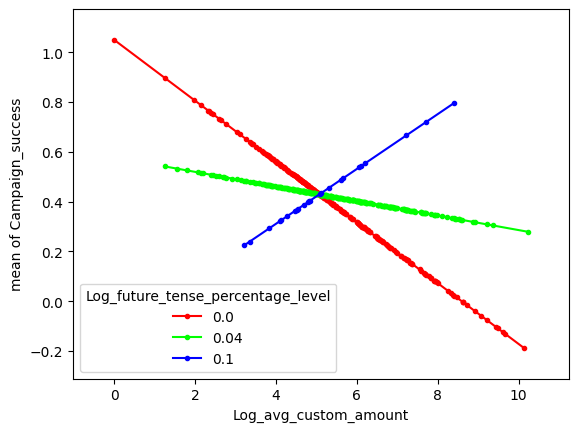

In [318]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg6 = ols(formula = "Log_Actual_Donation_Amount ~ Log_future_tense_percentage_level + Log_avg_custom_amount+ Campaign_frequency", data = extract_data)
Fit6 = Reg6.fit()

Reg7 = ols(formula = "Campaign_success ~ Log_future_tense_percentage_level * Log_avg_custom_amount", data = extract_data)
Fit7 = Reg7.fit()

from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(extract_data['Log_avg_custom_amount'], extract_data['Log_future_tense_percentage_level'], Fit7.fittedvalues,
                       ylabel='Campaign_success', xlabel='Log_avg_custom_amount')

import matplotlib.pyplot as plt
plt.show()

In [319]:
Model1_variables = ['Future_tense_percentage', 'Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.057
Model:                                    OLS   Adj. R-squared:                  0.057
Method:                         Least Squares   F-statistic:                     220.8
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):           7.83e-94
Time:                                11:44:01   Log-Likelihood:                -15125.
No. Observations:                        7340   AIC:                         3.026e+04
Df Residuals:                            7337   BIC:                         3.028e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# New Version 1 model

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [320]:
extract_data['Org_causes'].value_counts()

4    5714
3     906
1     439
2     281
Name: Org_causes, dtype: int64

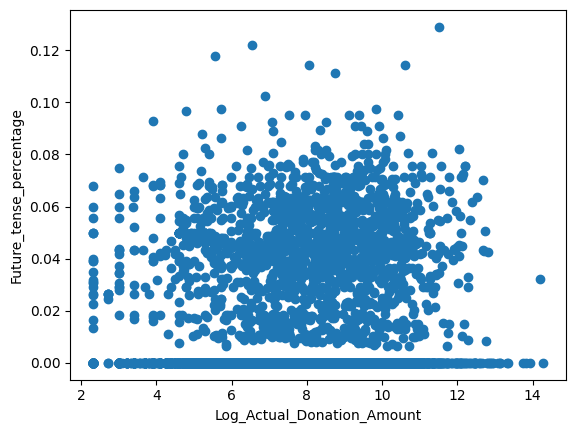

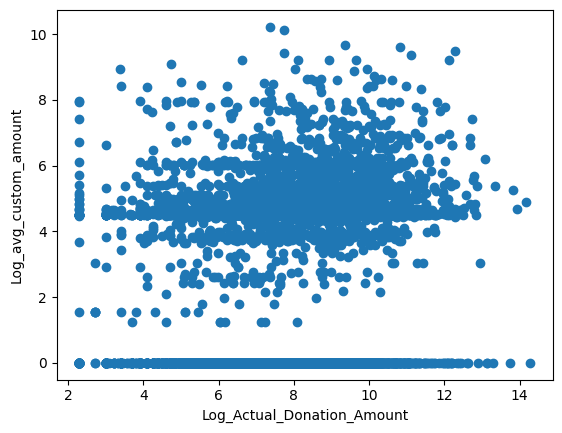

In [321]:
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Future_tense_percentage"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Future_tense_percentage')
plt.show()

#plt.subplot(222)
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Log_avg_custom_amount"])
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Log_avg_custom_amount')
plt.show()

In [322]:
extract_data["Campaign_Start_Year"] = pd.to_numeric(extract_data["Campaign_Start_Year"])
extract_data["Creator_Type"] = pd.to_numeric(extract_data["Creator_Type"])

In [323]:
extract_data.columns[-70:]

Index(['Org_Cause_Health', 'Org_Cause_Humanitarian', 'Org_Cause_Social_Service', 'Org_Cause_Sports', 'Org_Cause_Women_&_Girls', 'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_&_Heritage',
       'Cam_Cause_Children_&_Youth', 'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education', 'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families', 'Cam_Cause_Health',
       'Cam_Cause_Humanitarian', 'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_&_Girls', 'Pub_Enquiry_Person', 'Pub_Enquiry_Contact', 'Pub_Enquiry_Email', 'Web_URL',
       'Facebook_Link', 'Org_causes', 'Cam_causes', 'S/N', 'Type', 'UEN', 'IPC_Period', 'Sector', 'Classification', 'Activities', 'Scale_type', 'Donation_per_donor', 'Sector_type',
       'Campaign_Image_Number', 'Campaign_Start_Day', 'Campaign_Start_Month', 'Campaign_Start_Year', 'Campaign_End_Day', 'Campaign_End_Month', 'Campaign_End_Year', 'Campaign_Start', 'Campaign_End',
       'Campaign_Duration', 'Campaign_Start_Year_categor

In [324]:
# extract_data.to_csv('4-Jun-dataset.csv')

# Base model

In [325]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.342
Model:                                    OLS   Adj. R-squared:                  0.341
Method:                         Least Squares   F-statistic:                     346.3
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                11:44:05   Log-Likelihood:                -13803.
No. Observations:                        7340   AIC:                         2.763e+04
Df Residuals:                            7328   BIC:                         2.771e+04
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model 2 = Base model + Future tense percentage + Log_avg_custom_amount

In [326]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Future_tense_percentage", "Log_avg_custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.344
Model:                                    OLS   Adj. R-squared:                  0.343
Method:                         Least Squares   F-statistic:                     296.0
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                11:44:06   Log-Likelihood:                -13790.
No. Observations:                        7340   AIC:                         2.761e+04
Df Residuals:                            7326   BIC:                         2.770e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model 3 = Model 2 + Future_tense_percentage_X_Log_avg_custom_amount

In [327]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Future_tense_percentage", "Log_avg_custom_amount",
                    'Future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)


                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.347
Model:                                    OLS   Adj. R-squared:                  0.346
Method:                         Least Squares   F-statistic:                     277.8
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                11:44:06   Log-Likelihood:                -13776.
No. Observations:                        7340   AIC:                         2.758e+04
Df Residuals:                            7325   BIC:                         2.769e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

# Robustness test 1

In [328]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Future_tense_percentage", "Log_avg_custom_amount",
                    'Future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Distinct_Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)


                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.276
Model:                             OLS   Adj. R-squared:                  0.275
Method:                  Least Squares   F-statistic:                     199.4
Date:                 Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                         11:44:07   Log-Likelihood:                -12114.
No. Observations:                 7340   AIC:                         2.426e+04
Df Residuals:                     7325   BIC:                         2.436e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

# Robustness test 2

In [329]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Future_tense_percentage", "Log_avg_custom_amount",
                    'Future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           3.83e-74
Time:                        11:44:09   Log-Likelihood:                -15806.
No. Observations:                7340   AIC:                         3.164e+04
Df Residuals:                    7325   BIC:                         3.175e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

# Calculate Residual Standard Error

In [330]:
# Residual Standard Error of the model
np.sqrt(model1.scale)

2.086469265073798

# Calculate predicted_r2

In [331]:
y_true= Y
y_pred = model1.predict(X)
xs = X

def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst
 
def r2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

print(predicted_r2(y_true, y_pred, xs))
    

0.047464800108335536


In [332]:
IV1 = extract_data['Future_tense_percentage']
len(model1.resid)

7340

In [333]:
len(IV1)

7340

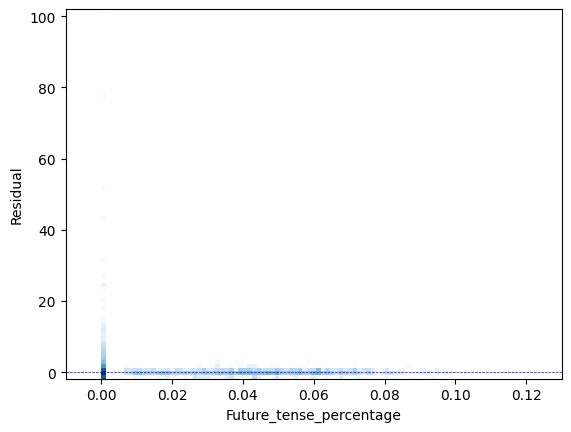

In [334]:
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
IV1 = extract_data['Future_tense_percentage']

# 绘制散点图和参考线
x = np.array(model1.resid)
y =np.array(IV1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
#plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Future_tense_percentage")
plt.xlim((-0.01, 0.13))
plt.ylabel("Residual")
plt.show()


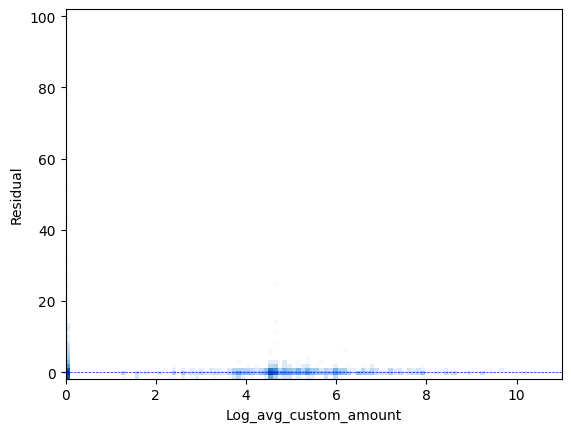

In [335]:
IV2 = extract_data['Log_avg_custom_amount']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV2)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
#plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Log_avg_custom_amount")
plt.xlim((0, 11))
plt.ylabel("Residual")
plt.show()

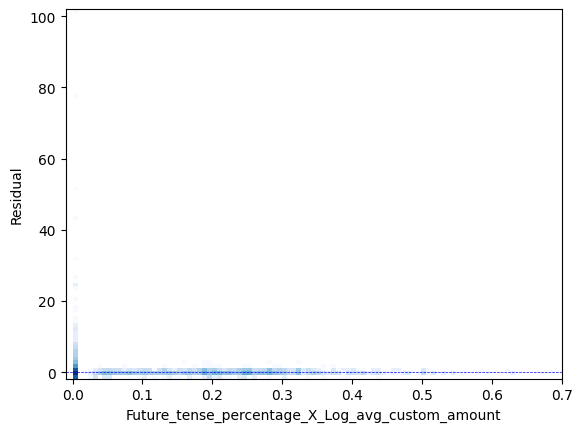

In [336]:
Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(Interaction_v)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
#plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Future_tense_percentage_X_Log_avg_custom_amount")
plt.xlim((-0.01, 0.7))
plt.ylabel("Residual")
plt.show()

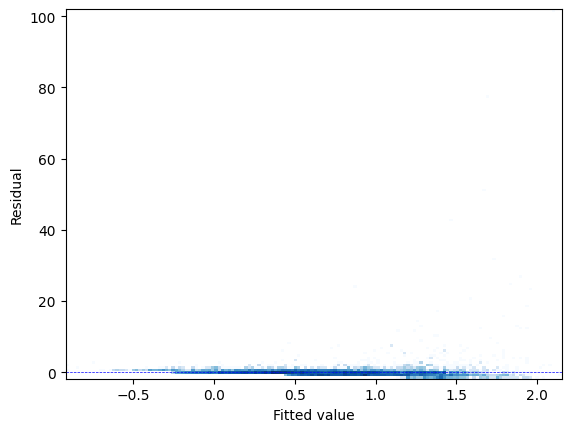

In [ ]:

y_true= Y
y_pred = model1.predict(X)

x = np.array(model1.resid)
y =np.array(y_pred)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
# plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.hist2d(y, x, bins=150, norm=LogNorm(), cmap='Blues' )

plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Fitted value")
plt.ylabel("Residual")
plt.show()



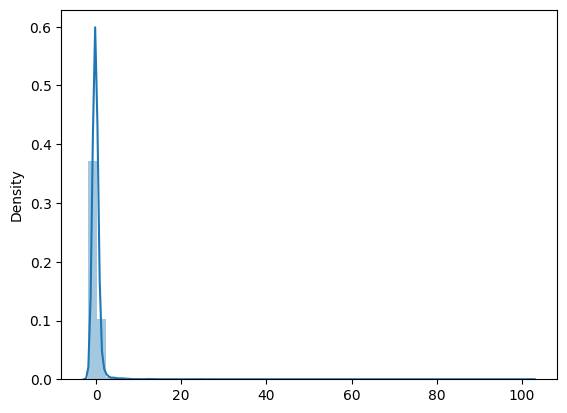

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
# 样例1
ax = plt.axes()
res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法


sns.distplot(res)
plt.show()



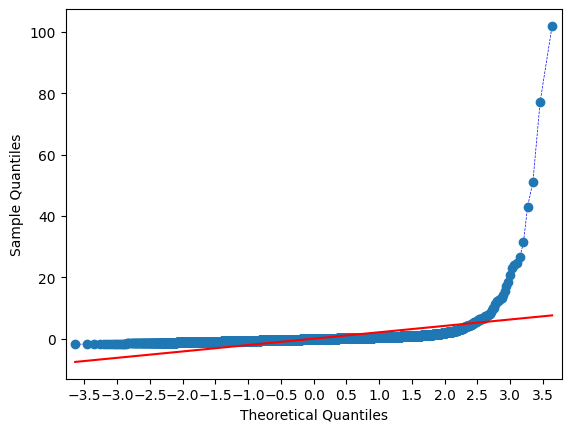

In [ ]:
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s', linestyle='--', lw=0.5) # 调用函数
x_major_locator=MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

# Unusual observations

In [ ]:

#异常值检验
outliers = model1.get_influence()
#高杠杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag
#DFFITS值
dffits = outliers.dffits[0]
#学生化残差
resid_stu = outliers.resid_studentized_external
#Cook距离
cook = outliers.cooks_distance[0]
#合并各种异常值检验的统计量值
contat1 = pd.concat([pd.Series(leverage, name='leverage'), pd.Series(dffits, name='dffits'), pd.Series(resid_stu, name='resid_stu'), pd.Series(cook, name='cook')], axis=1)
#重设train数据的行索引
extract_data.index = range(extract_data.shape[0])
#将上面的统计量与train数据集合并
profit_outliers = pd.concat([extract_data, contat1], axis=1)
#横向最多显示多少个字符， 一般80不适合横向的屏幕，平时多用200
pd.set_option('display.width', 200)
#显示所有列
pd.set_option('display.max_columns',None)
#显示所有行
pd.set_option('display.max_rows', None)
#print(profit_outliers)


#print(profit_outliers[np.abs(profit_outliers.resid_stu)>4])
#计算异常值数量的比例
#outliers_ratio = sum(np.where( (np.abs(profit_outliers.resid_stu)>2), 1, 0)) / profit_outliers.shape[0]
#print(outliers_ratio)


In [ ]:
print(profit_outliers[np.abs(profit_outliers.resid_stu)>2].shape)

(368, 116)


In [ ]:
out_liers_Campaign_Id = profit_outliers[np.abs(profit_outliers.resid_stu)>2]['Campaign_Id'].to_list()

In [ ]:
extract_data.shape


(7340, 112)

In [ ]:
out_liers_Campaign_Id = profit_outliers[np.abs(profit_outliers.resid_stu)>2]['Campaign_Id'].to_list()
num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Campaign_Id'] in out_liers_Campaign_Id:
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete out liers numbers :", num1)  

Total delete out liers numbers : 368


In [ ]:
extract_data.shape

(6972, 112)

# 这里已经清理到outliers 还剩6972

In [ ]:
numeric_features2 = ['Log_Actual_Donation_Amount', 'Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount",
                    'Log_future_tense_percentage_X_Log_avg_custom_amount']

In [ ]:
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))


In [ ]:
test_data = extract_data[numeric_features2[1:]]
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


## Log Avg custom amount level

In [ ]:
extract_data['Log_avg_custom_amount'].min()

0.0

In [ ]:
extract_data['Log_avg_custom_amount'].max()

10.130124993104594

In [ ]:
np.median(extract_data['Log_avg_custom_amount'])


0.0

In [ ]:
extract_data['Log_Avg_custom_amount_level'].unique()


KeyError: 'Log_Avg_custom_amount_level'

In [ ]:
extract_data['Log_avg_custom_amount'].mean()

2.3497493171568795

In [ ]:
extract_data['Log_Avg_custom_amount_level'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Log_avg_custom_amount'] < 5.35 and extract_data.loc[index,'Log_avg_custom_amount'] > 2.35:
        extract_data.loc[index,'Log_Avg_custom_amount_level'] = 2.35
    if extract_data.loc[index,'Log_avg_custom_amount'] >= 5.35:
        extract_data.loc[index,'Log_Avg_custom_amount_level'] = 5.35

    if extract_data.loc[index,'Log_avg_custom_amount'] <= 2.35:
        extract_data.loc[index,'Log_Avg_custom_amount_level'] = 0.35

In [ ]:
extract_data['Log_Avg_custom_amount_level'].unique()


array([2.35, 0.35, 5.35])

# Another Base model

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.483
Model:                                    OLS   Adj. R-squared:                  0.482
Method:                         Least Squares   F-statistic:                     590.2
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                00:11:26   Log-Likelihood:                -11592.
No. Observations:                        6972   AIC:                         2.321e+04
Df Residuals:                            6960   BIC:                         2.329e+04
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.63113465960979
Predicted R2 : 0.48068882472442764


# Change future tense and custom amount into category variables

In [ ]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name', 'Receiving_NPO_Id', 'NPO_Status', 'Campaign_frequency', 'Public_Campaign_Access', 'Creator_Type', 'Creator_Id', 'Campaign_Status',
       ...
       'Future_tense_percentage_X_Campaign_frequency', 'Future_tense_percentage_X_Log_avg_custom_amount', 'Future_tense_percentage_X_Avg_custom_amount', 'Log_Actual_Donation_Amount_round',
       'Log_future_tense_percentage_level', 'Log_Future_tense_percentage', 'Log_future_tense_percentage_X_Log_avg_custom_amount', 'Log_Avg_custom_amount_level', 'Future_tense_categoty',
       'Custom_amount_categoty'],
      dtype='object', length=118)

In [ ]:
extract_data['Future_tense_categoty'] = 0
extract_data['Custom_amount_categoty'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Future_tense'] > 0:
        extract_data.loc[index,'Future_tense_categoty'] = 1
    if extract_data.loc[index,'Avg_custom_amount'] > 0:
        extract_data.loc[index,'Custom_amount_categoty'] = 1

# Another model 2

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Future_tense_categoty", "Custom_amount_categoty"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.488
Model:                                    OLS   Adj. R-squared:                  0.487
Method:                         Least Squares   F-statistic:                     510.7
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                00:11:27   Log-Likelihood:                -11554.
No. Observations:                        6972   AIC:                         2.314e+04
Df Residuals:                            6958   BIC:                         2.323e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.6137221760814024


Predicted R2 : 0.48606785166163413


# Model 1 --- 16 Jun

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.483
Model:                                    OLS   Adj. R-squared:                  0.482
Method:                         Least Squares   F-statistic:                     590.2
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                00:17:24   Log-Likelihood:                -11592.
No. Observations:                        6972   AIC:                         2.321e+04
Df Residuals:                            6960   BIC:                         2.329e+04
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
test_data = extract_data[Model1_variables]
for i in Model1_variables:
	print(i, "\t", vif(df=test_data, col_i=i))

Log_Campaign_Goal 	 1.4785426970553952
NPO_Ipc_Status_For_Tax_Deductibility 	 1.290986582204881
Campaign_Duration 	 1.2189527053891254
Campaign_Video 	 1.0288513205955807
Campaign_Image_Number 	 1.0724283895025055
Number_of_words_describing_campaign 	 1.104651491967528
Creator_Type 	 1.130575120653843
Scale_type 	 1.334771627226188
Sector_type 	 1.0296725282430563
Campaign_Start_Year_category 	 1.1152045890285158
Campaign_frequency 	 1.3423086342536261


# Model 1 robust test 1

In [ ]:

Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Distinct_Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.336
Model:                             OLS   Adj. R-squared:                  0.335
Method:                  Least Squares   F-statistic:                     320.2
Date:                 Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                         00:17:28   Log-Likelihood:                -10882.
No. Observations:                 6972   AIC:                         2.179e+04
Df Residuals:                     6960   BIC:                         2.187e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.3303573442351524


Predicted R2 : 0.3335809510365161


# Model 1 robust test 2

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     82.64
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          2.95e-176
Time:                        00:11:29   Log-Likelihood:                -10645.
No. Observations:                6972   AIC:                         2.131e+04
Df Residuals:                    6960   BIC:                         2.140e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2431022080488225


Predicted R2 : 0.11200001557904404


In [ ]:
extract_data['Sqr_future_tense_percentage'] = np.sqrt(extract_data['Future_tense_percentage'])

In [ ]:
extract_data['Log_Future_tense_percentage'] = np.log(extract_data['Future_tense_percentage'] + 1)
extract_data['Log_avg_custom_amount'] = np.log(extract_data['Avg_custom_amount'] + 1)
extract_data['Log_future_tense_percentage_X_Log_avg_custom_amount'] = extract_data['Log_Future_tense_percentage'] * extract_data['Log_avg_custom_amount']


In [ ]:
min(extract_data['Log_avg_custom_amount'])

0.0

# Model2 ---- 6 Jun

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.487
Model:                                    OLS   Adj. R-squared:                  0.486
Method:                         Least Squares   F-statistic:                     508.4
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                00:11:30   Log-Likelihood:                -11562.
No. Observations:                        6972   AIC:                         2.315e+04
Df Residuals:                            6958   BIC:                         2.325e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.6172175091172134


Predicted R2 : 0.48494800023760354


In [ ]:
test_data = extract_data[Model1_variables]
for i in Model1_variables:
	print(i, "\t", vif(df=test_data, col_i=i))

Log_Campaign_Goal 	 1.759315321695053
NPO_Ipc_Status_For_Tax_Deductibility 	 1.2960451965800492


Campaign_Duration 	 1.2216739164111987
Campaign_Video 	 1.0381749091505372
Campaign_Image_Number 	 1.0787484710571278
Number_of_words_describing_campaign 	 1.1174570019923398
Creator_Type 	 1.8104765266115073
Scale_type 	 1.3350136590218404
Sector_type 	 1.0391030413064757
Campaign_Start_Year_category 	 1.1172904133056796
Campaign_frequency 	 1.3689514708606232
Log_Future_tense_percentage 	 1.3545892792027279
Log_avg_custom_amount 	 2.8138006544472005


# Model 2 Robust test 1

In [ ]:

Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Distinct_Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.351
Model:                             OLS   Adj. R-squared:                  0.350
Method:                  Least Squares   F-statistic:                     290.0
Date:                 Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                         00:18:03   Log-Likelihood:                -10800.
No. Observations:                 6972   AIC:                         2.163e+04
Df Residuals:                     6958   BIC:                         2.172e+04
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353


Predicted R2 : 0.3485599688377843


# Model 2 Robust test 2

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     71.74
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          7.44e-179
Time:                        00:11:32   Log-Likelihood:                -10635.
No. Observations:                6972   AIC:                         2.130e+04
Df Residuals:                    6958   BIC:                         2.139e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2397031959479095
Predicted R2 : 0.11443130202636864


# Model 3 ---- 6 Jun

# Future_tense_percentage_X_Log_avg_custom_amount

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount",
                    'Log_future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.490
Model:                                    OLS   Adj. R-squared:                  0.489
Method:                         Least Squares   F-statistic:                     476.7
Date:                        Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                                10:43:56   Log-Likelihood:                -11545.
No. Observations:                        6972   AIC:                         2.312e+04
Df Residuals:                            6957   BIC:                         2.322e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------

In [ ]:
test_data = extract_data[Model1_variables]
for i in Model1_variables:
	print(i, "\t", vif(df=test_data, col_i=i))

Log_Campaign_Goal 	 1.7601658763700843
NPO_Ipc_Status_For_Tax_Deductibility 	 1.2978005388334468
Campaign_Duration 	 1.2217604131140474
Campaign_Video 	 1.040057179753805
Campaign_Image_Number 	 1.0789290319800908
Number_of_words_describing_campaign 	 1.1194468495389418
Creator_Type 	 1.8469145809637937
Scale_type 	 1.3365592097365433
Sector_type 	 1.0400675524038567
Campaign_Start_Year_category 	 1.1210658890985075
Campaign_frequency 	 1.373675259257982
Log_Future_tense_percentage 	 25.549024502001004
Log_avg_custom_amount 	 2.9604742667496478
Log_future_tense_percentage_X_Log_avg_custom_amount 	 26.414308358103202


# Breusch–Pagan test

In [ ]:
 # Conduct the Breusch-Pagan test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
fit = smf.ols('Log_Actual_Donation_Amount ~ Log_Campaign_Goal+NPO_Ipc_Status_For_Tax_Deductibility+Campaign_Duration \
                     +Campaign_Video+Campaign_Image_Number+Number_of_words_describing_campaign+ \
                    Creator_Type+Scale_type+Sector_type+Campaign_Start_Year_category+ \
                    +Campaign_frequency+Log_Future_tense_percentage+Log_avg_custom_amount+ \
                    Log_future_tense_percentage_X_Log_avg_custom_amount', data=extract_data).fit()

bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)

print("Lagrange multiplier statistic---> " + str(bp_lm))
print("Lagrange multiplier p-value-----> " + str(bp_lm_pvalue))
print("F-statistic---------------------> " + str(bp_fvalue))
print("P-value of F-statistic----------> " + str(bp_f_pvalue))

Lagrange multiplier statistic---> 443.68475607943935
Lagrange multiplier p-value-----> 7.688937521189204e-86
F-statistic---------------------> 33.77282250707945
P-value of F-statistic----------> 7.836144432983804e-89


In [ ]:
# Test for heteroscedasticity using the Breusch-Pagan test
# NOTE: statsmodels refers to X variables as `exog` for exogenous
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)

print("Lagrange multiplier statistic---> " + str(bp_lm))
print("Lagrange multiplier p-value-----> " + str(bp_lm_pvalue))
print("F-statistic---------------------> " + str(bp_fvalue))
print("P-value of F-statistic----------> " + str(bp_f_pvalue))

Lagrange multiplier statistic---> 443.68475607943935
Lagrange multiplier p-value-----> 7.688937521189204e-86
F-statistic---------------------> 33.77282250707945
P-value of F-statistic----------> 7.836144432983804e-89


# Breusch–Godfrey test

In [ ]:
import statsmodels.stats.diagnostic as dg

#perform Breusch-Godfrey test at order p = 3

print(dg.acorr_breusch_godfrey(model1, nlags=3))


(428.1888374508966, 1.73278150293331e-92, 151.676400885706, 3.222076073717698e-95)


In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 2.4010959410283466
Predicted R2 : 0.3354027476698199


# New robostness test 1 --- 6 Jun

In [ ]:

Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount",
                    'Log_future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Distinct_Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

y_true= Y
y_pred = model1.predict(X)
xs = X


                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.352
Model:                             OLS   Adj. R-squared:                  0.350
Method:                  Least Squares   F-statistic:                     269.6
Date:                 Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                         10:44:12   Log-Likelihood:                -10799.
No. Observations:                 6972   AIC:                         2.163e+04
Df Residuals:                     6957   BIC:                         2.173e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

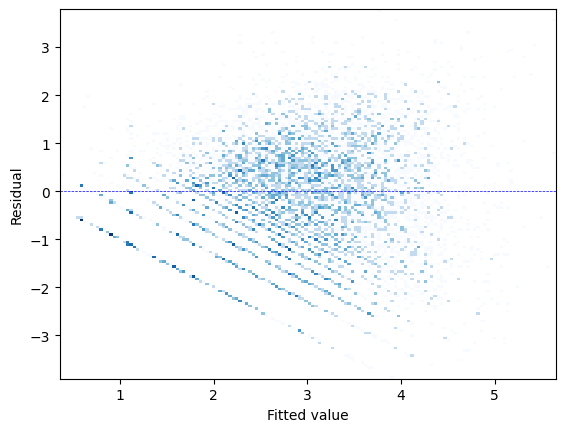

In [ ]:

x = np.array(model1.resid)
y =np.array(y_pred)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
# plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.hist2d(y, x, bins=150, norm=LogNorm(), cmap='Blues' )

plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Fitted value")
plt.ylabel("Residual")
plt.savefig('Robust_test_residule.png', dpi=1600)
plt.show()



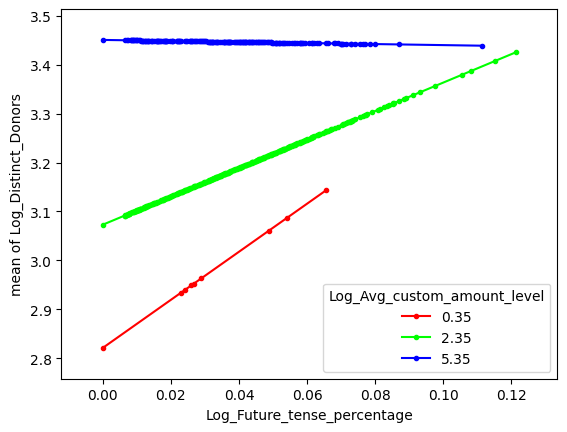

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#Reg6 = ols(formula = "Log_Distinct_Donors ~ Log_future_tense_percentage_level + Log_avg_custom_amount+ Campaign_frequency", data = extract_data)
#Fit6 = Reg6.fit()

Reg7 = ols(formula = "Log_Distinct_Donors ~ Log_Avg_custom_amount_level * Log_Future_tense_percentage ", data = extract_data)
#Reg7 = ols(formula = "Log_Actual_Donation_Amount ~ Log_future_tense_percentage_level * Log_avg_custom_amount", data = extract_data)

Fit7 = Reg7.fit()

from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(extract_data['Log_Future_tense_percentage'], extract_data['Log_Avg_custom_amount_level'], Fit7.fittedvalues,
                       ylabel='Log_Distinct_Donors', xlabel='Log_Future_tense_percentage')

import matplotlib.pyplot as plt
plt.show()

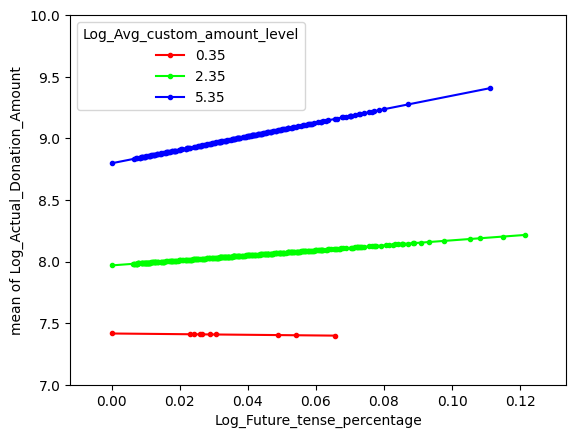

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#Reg6 = ols(formula = "Log_Distinct_Donors ~ Log_future_tense_percentage_level + Log_avg_custom_amount+ Campaign_frequency", data = extract_data)
#Fit6 = Reg6.fit()

Reg7 = ols(formula = "Log_Actual_Donation_Amount ~ Log_Avg_custom_amount_level * Log_Future_tense_percentage ", data = extract_data)
#Reg7 = ols(formula = "Log_Actual_Donation_Amount ~ Log_future_tense_percentage_level * Log_avg_custom_amount", data = extract_data)

Fit7 = Reg7.fit()

from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(extract_data['Log_Future_tense_percentage'], extract_data['Log_Avg_custom_amount_level'], Fit7.fittedvalues,
                       ylabel='Log_Actual_Donation_Amount', xlabel='Log_Future_tense_percentage')

import matplotlib.pyplot as plt
plt.ylim((7, 10))
plt.show()

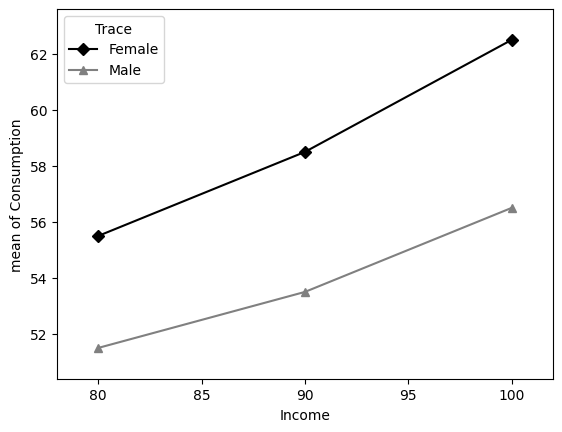

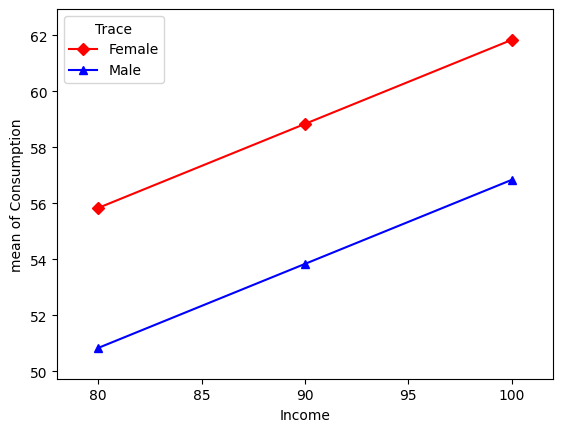

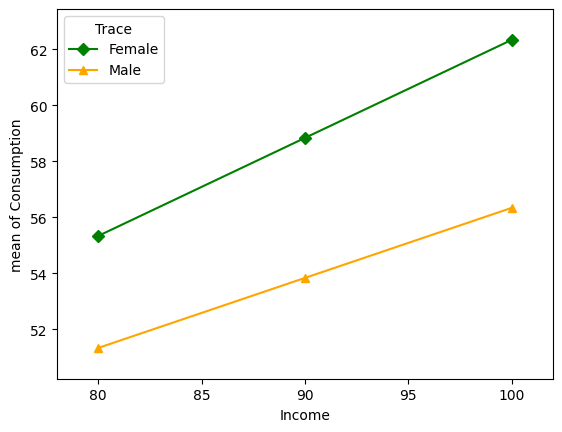

In [ ]:
Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100]

import pandas as pd
df6 = pd.DataFrame(
 {
   "Consumption": Consumption
 , "Gender": Gender
 , "Income": Income
 }
 )

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg6 = ols(formula = "Consumption ~ Gender + Income", data = df6)
Fit6 = Reg6.fit()

Reg7 = ols(formula = "Consumption ~ Gender*Income", data = df6)
Fit7 = Reg7.fit()

from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(Income, Gender, Consumption,
             colors=['black','gray'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
fig = interaction_plot(Income, Gender, Fit6.fittedvalues,
             colors=['red','blue'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
fig = interaction_plot(Income, Gender, Fit7.fittedvalues,
             colors=['green','orange'], markers=['D','^'], ylabel='Consumption', xlabel='Income')

import matplotlib.pyplot as plt
plt.show()

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.299554592397469
Predicted R2 : 0.34865803861216615


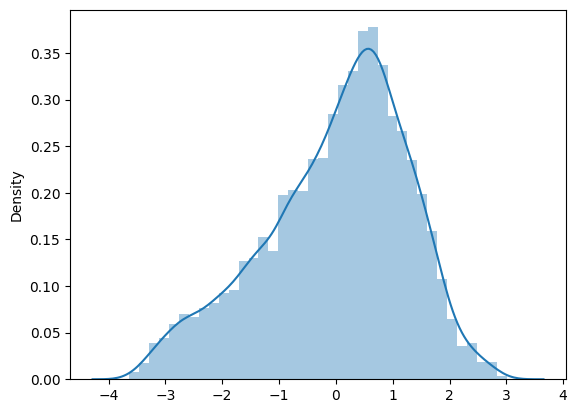

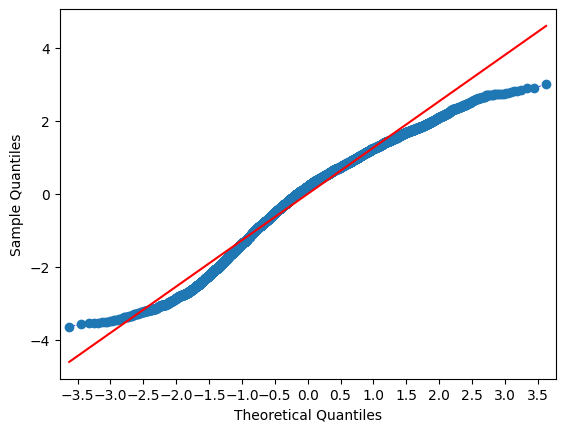

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
# 样例1
ax = plt.axes()
res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法

sns.distplot(res)
plt.show()

probplot = sm.ProbPlot(res) # 实例probplt
probplot.qqplot(line='s', linestyle='--', lw=0.5) # 调用函数
x_major_locator=MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

# New robostness test 2 --- 6 Jun

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Log_Future_tense_percentage", "Log_avg_custom_amount",
                    'Log_future_tense_percentage_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     152.7
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:50:40   Log-Likelihood:                -2455.1
No. Observations:                6972   AIC:                             4940.
Df Residuals:                    6957   BIC:                             5043.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 0.11865015234352982
Predicted R2 : 0.23189945016980107


In [ ]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name', 'Receiving_NPO_Id', 'NPO_Status', 'Campaign_frequency', 'Public_Campaign_Access', 'Creator_Type', 'Creator_Id', 'Campaign_Status',
       ...
       'Campaign_success', 'Log_campaign_success', 'Log_Org_causes', 'Future_tense_percentage_X_Campaign_frequency', 'Future_tense_percentage_X_Log_avg_custom_amount',
       'Log_Actual_Donation_Amount_round', 'Log_future_tense_percentage_level', 'Log_Future_tense_percentage', 'Log_future_tense_percentage_X_Log_avg_custom_amount', 'Sqr_future_tense_percentage'],
      dtype='object', length=115)

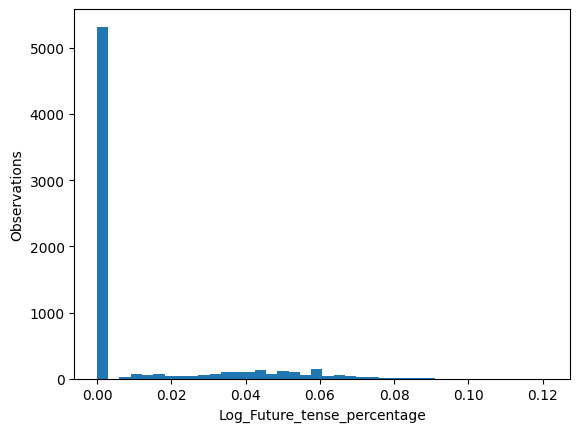

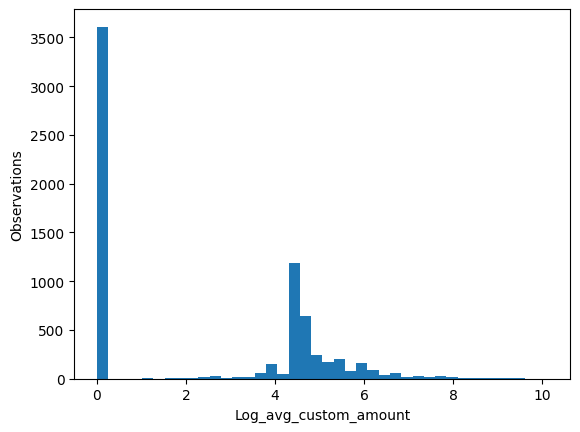

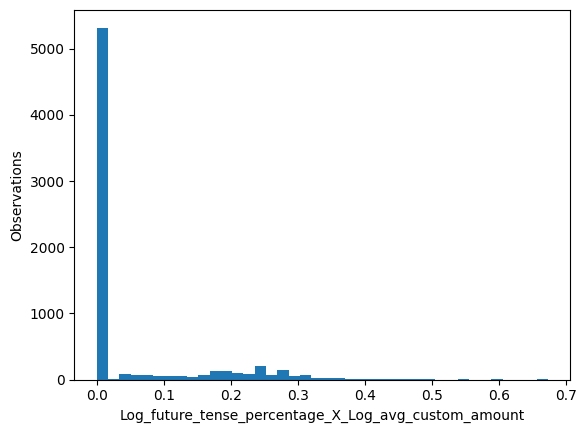

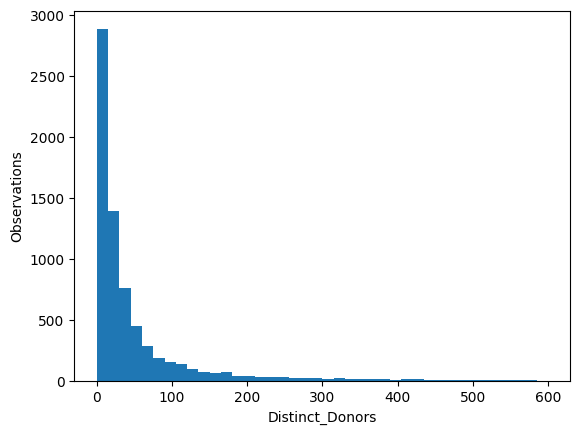

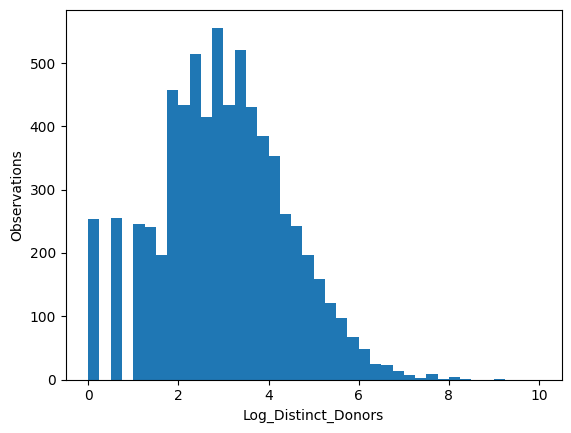

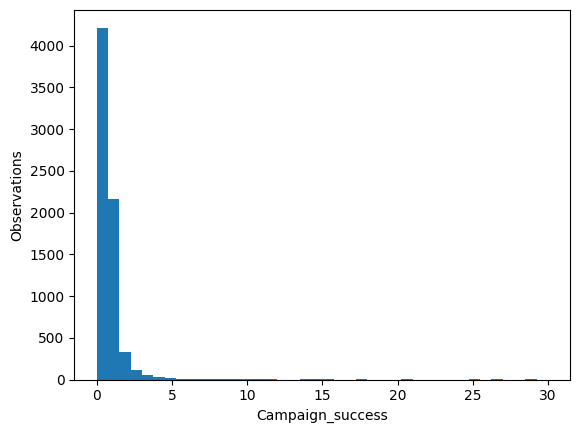

In [ ]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Log_Future_tense_percentage'], bins=40)
plt.xlabel('Log_Future_tense_percentage'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Log_avg_custom_amount'], bins=40 )
plt.xlabel('Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(449)
plt.hist(extract_data['Log_future_tense_percentage_X_Log_avg_custom_amount'], bins=40)
plt.xlabel('Log_future_tense_percentage_X_Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Distinct_Donors'], bins=40, range=[0, 600])
plt.xlabel('Distinct_Donors'); plt.ylabel('Observations')
plt.show()

plt.hist(extract_data['Log_Distinct_Donors'], bins=40,  range=[0, 10])
plt.xlabel('Log_Distinct_Donors'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Campaign_success'], bins=40, range=[0, 30])
plt.xlabel('Campaign_success'); plt.ylabel('Observations')
plt.show()



In [ ]:
np.log(2)

0.6931471805599453

In [ ]:
np.log(3)

1.0986122886681098

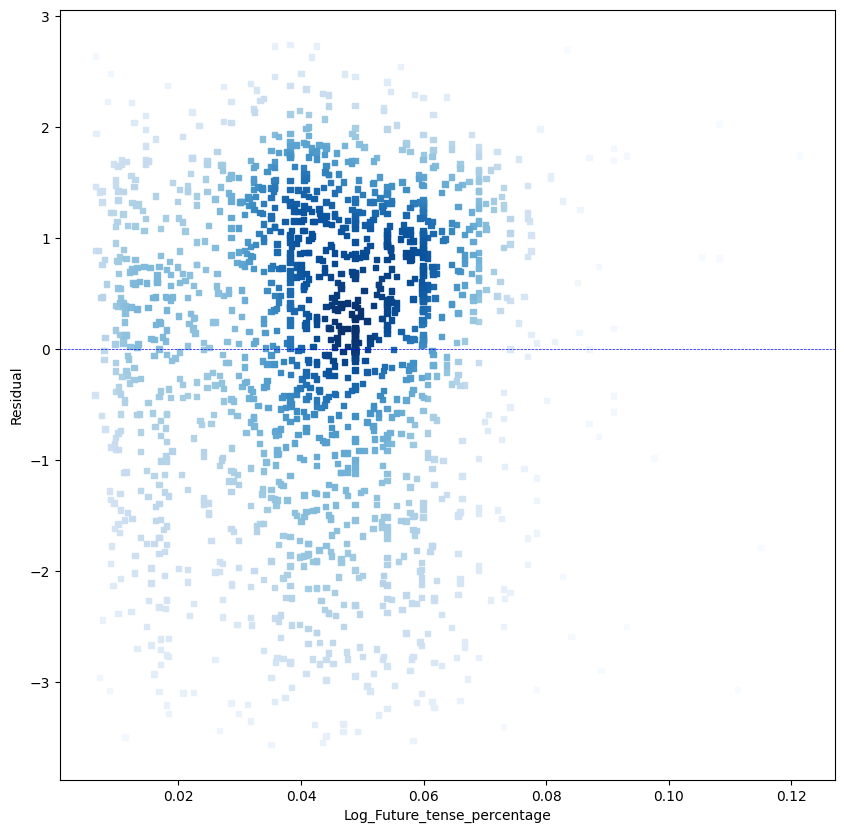

In [ ]:
IV2 = extract_data['Log_Future_tense_percentage']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV2)
# 这里去掉蓝线 0
x = np.delete(x, y == 0)
y = np.delete(y, y == 0)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]

plt.figure(figsize=(10,10))
plt.scatter(y, x, marker=',', c=z, s=15, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Log_Future_tense_percentage")
#plt.xlim((-0.5, 11))
plt.ylabel("Residual")
#plt.savefig('Log_Future_tense_percentage.png', dpi=1600)
plt.show()

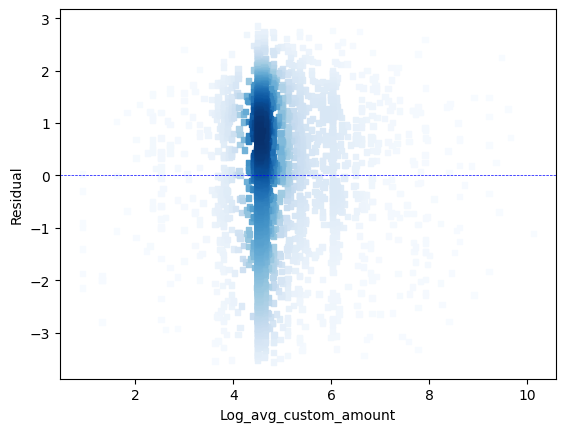

In [ ]:
IV2 = extract_data['Log_avg_custom_amount']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV2)

x = np.delete(x, y == 0)
y = np.delete(y, y == 0)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
#plt.figure(figsize=(10,10))
plt.scatter(y, x, marker=',', c=z, s=15, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Log_avg_custom_amount")
#plt.xlim((-0.5, 11))
plt.ylabel("Residual")
#plt.savefig('Log_future_tense_percentage_X_Log_avg_custom_amount.png', dpi=1600)
plt.show()


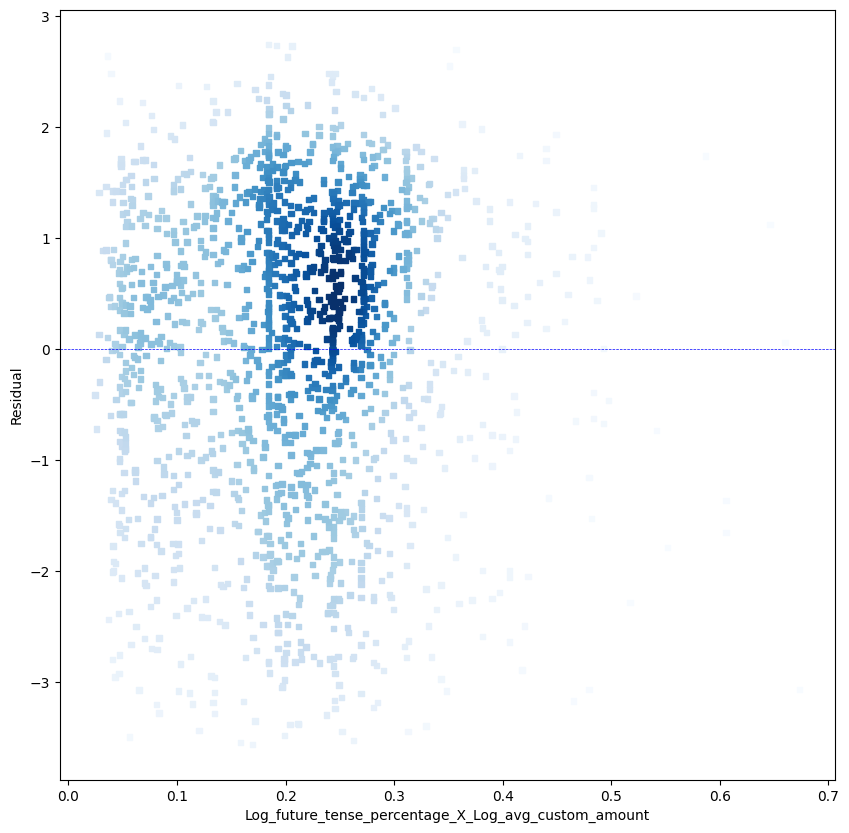

In [ ]:
IV2 = extract_data['Log_future_tense_percentage_X_Log_avg_custom_amount']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV2)

x = np.delete(x, y == 0)
y = np.delete(y, y == 0)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
plt.figure(figsize=(10,10))
plt.scatter(y, x, marker=',', c=z, s=15, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Log_future_tense_percentage_X_Log_avg_custom_amount")
#plt.xlim((-0.5, 11))
plt.ylabel("Residual")
#plt.savefig('Log_future_tense_percentage_X_Log_avg_custom_amount.png', dpi=1600)
plt.show()

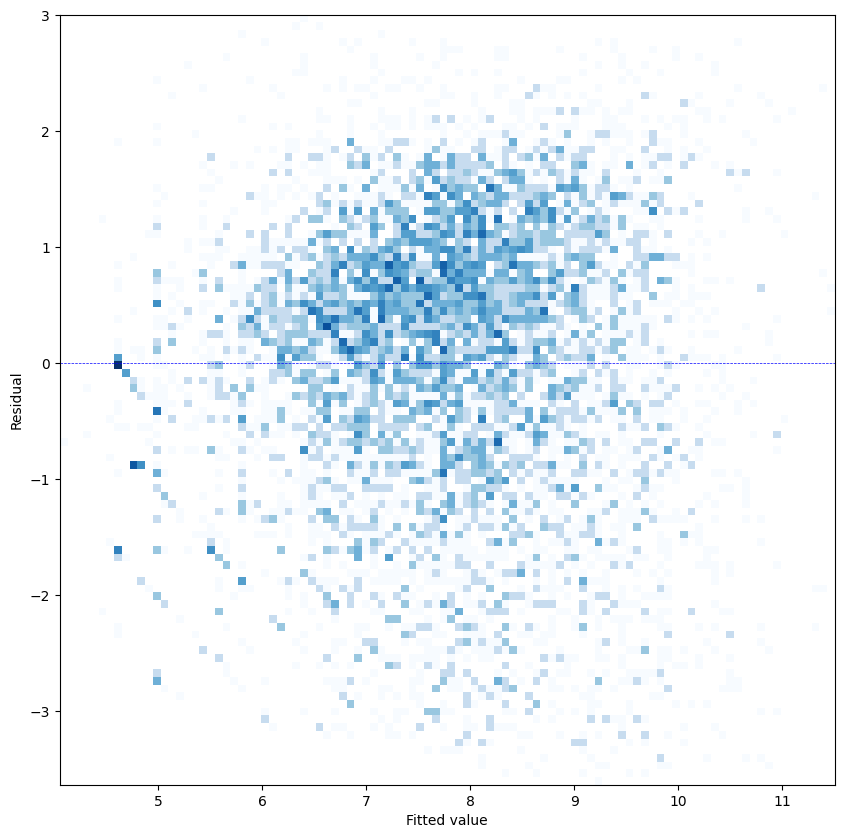

In [ ]:

y_true= Y
y_pred = model1.predict(X)

x = np.array(model1.resid)
y =np.array(y_pred)



xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
# plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.figure(figsize=(10,10))
plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )

plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Fitted value")
plt.ylabel("Residual")
plt.savefig('residule.png', dpi=1600)
plt.show()



In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# Another model 2-1 Need extract the dataset(Have future tense and custom amount)

In [ ]:
extract_data.shape

(6972, 114)

In [ ]:
short_list_campaigns = extract_data[extract_data['Future_tense_categoty'] == 1 ]

In [ ]:
short_list_campaigns.shape

(1651, 116)

In [ ]:
short_list_campaigns = short_list_campaigns[short_list_campaigns['Custom_amount_categoty'] == 1 ] 

In [ ]:
short_list_campaigns.shape

(1651, 116)

In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Future_tense", "Log_avg_custom_amount"]

import statsmodels.formula.api as smf
X = short_list_campaigns[Model1_variables] 
Y = short_list_campaigns['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.428
Model:                                    OLS   Adj. R-squared:                  0.424
Method:                         Least Squares   F-statistic:                     102.1
Date:                        Mon, 05 Jun 2023   Prob (F-statistic):          1.06e-188
Time:                                16:58:45   Log-Likelihood:                -2852.8
No. Observations:                        1651   AIC:                             5732.
Df Residuals:                            1638   BIC:                             5802.
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.8894558537607167
Predicted R2 : 0.41329028876287266


# 进行Box-Cox变换

In [ ]:
#进行Box-Cox变换
#box-cox
#stats.boxcox(data1)[0]
'''
extract_data['BC_Future_tense'] = extract_data['Future_tense']
extract_data['BC_Custom_amount'] = extract_data['Avg_custom_amount']

for index, row in extract_data.iterrows():
    if extract_data.loc[index,'BC_Future_tense'] == 0:
        extract_data.loc[index, "BC_Future_tense"] = 0.0001
    if extract_data.loc[index,'BC_Custom_amount'] == 0:
        extract_data.loc[index, "BC_Custom_amount"] = 0.0001
'''

In [ ]:
extract_data["BC_Future_tense"], best_lambda = stats.boxcox(extract_data["Future_tense"] + 0.00001)
extract_data["BC_Custom_amount"], best_lambda = stats.boxcox(extract_data["Avg_custom_amount"] + 0.00001)


In [ ]:
Model1_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',
                    "Creator_Type", 'Scale_type', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "BC_Future_tense", "BC_Custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.488
Model:                                    OLS   Adj. R-squared:                  0.487
Method:                         Least Squares   F-statistic:                     510.1
Date:                        Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                                15:55:05   Log-Likelihood:                -11556.
No. Observations:                        6972   AIC:                         2.314e+04
Df Residuals:                            6958   BIC:                         2.324e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.6146826687097922
Predicted R2 : 0.4857616243507188


In [ ]:
extract_data['BC_Future_tense'].unique()

array([ 9.99993472e-06, -1.07155770e+02,  1.37964635e+00,  1.60017509e+00,
        6.24644918e-01,  9.33178581e-01,  1.13002046e+00,  1.27121831e+00,
        1.46672268e+00,  1.53890544e+00,  1.65314449e+00])

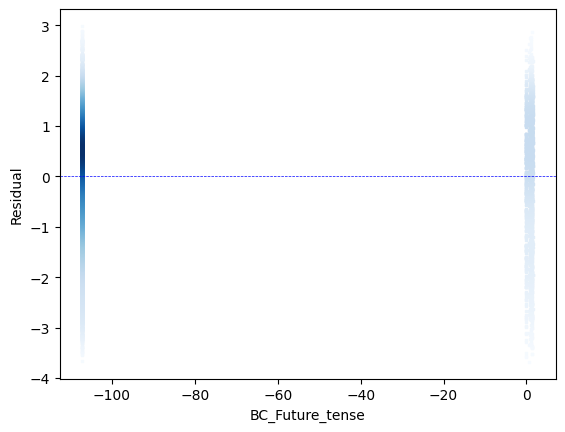

In [ ]:
IV1 = extract_data['BC_Future_tense']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
plt.scatter(y, x, marker=',', c=z, s=2, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("BC_Future_tense")
#plt.xlim((-0.5, 3))
plt.ylabel("Residual")
plt.show()

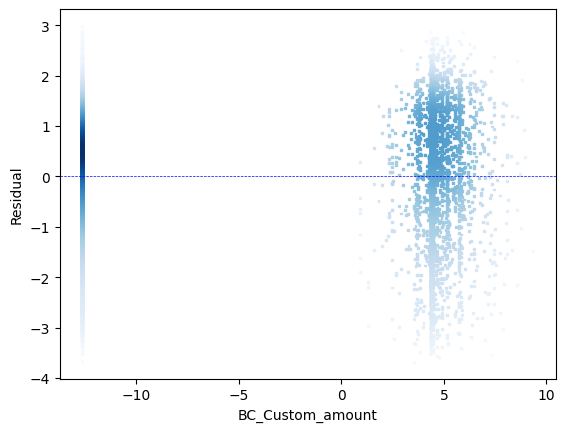

In [ ]:
IV2 = extract_data['BC_Custom_amount']
#Interaction_v = extract_data.Future_tense_percentage_X_Log_avg_custom_amount
x = np.array(model1.resid)
y =np.array(IV2)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
plt.scatter(y, x, marker=',', c=z, s=2, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("BC_Custom_amount")
#plt.xlim((-0.5, 11))
plt.ylabel("Residual")
plt.show()

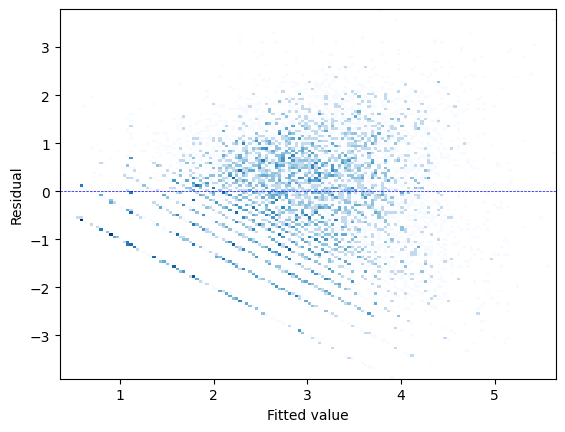

In [ ]:
min(extract_data["Future_tense"])

0

# QQ plot

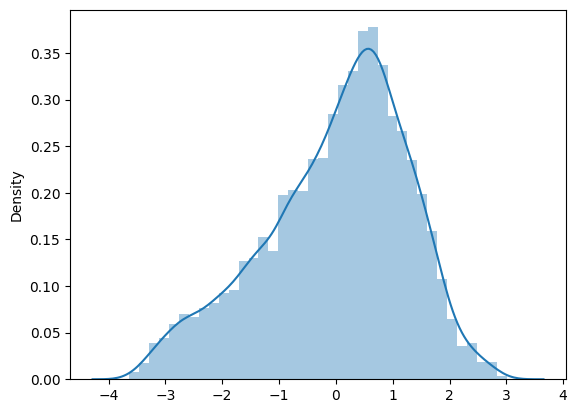

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
# 样例1
ax = plt.axes()
res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法


sns.distplot(res)
plt.show()



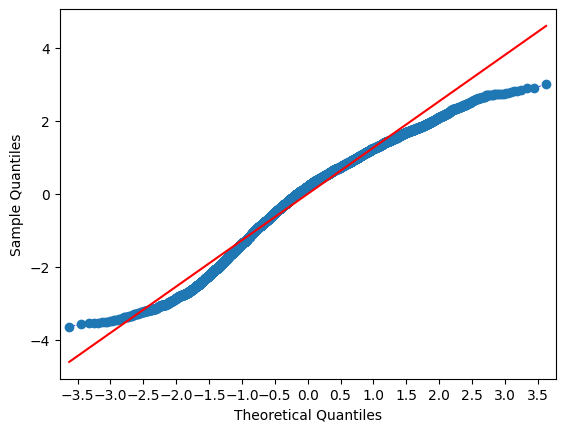

In [ ]:
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s', linestyle='--', lw=0.5) # 调用函数
x_major_locator=MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

Add Future_tense(not future_tense_percentage) result

In [ ]:
import pandas as pd

df_X = extract_data[['Future_tense_percentage','Log_Actual_Donation_Amount','Campaign_frequency']]
from pyprocessmacro import Process
p = Process(data=df_X, model=1, x="Future_tense_percentage", y="Log_Actual_Donation_Amount",m=["Campaign_frequency"],controls_in="all_to_y")
p.summary()
       
import matplotlib.pyplot as plt
g = p.plot_conditional_direct_effects(x = 'Campaign_frequency')
plt.show()


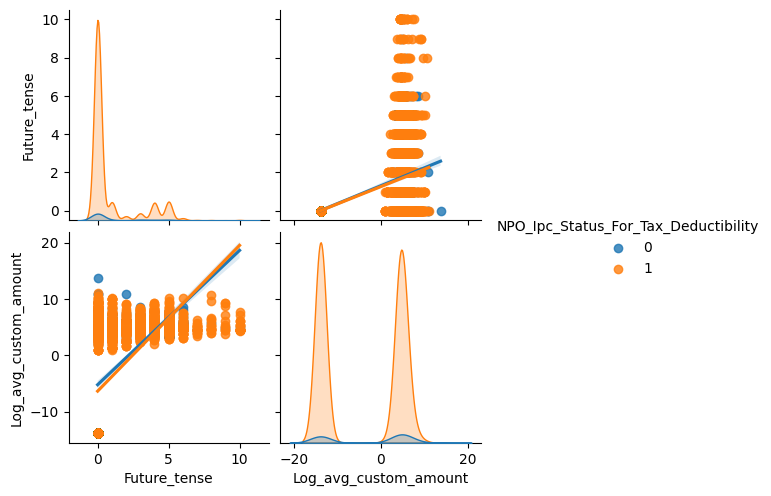

In [ ]:
import seaborn
seaborn.pairplot(extract_data, vars=['Future_tense','Log_avg_custom_amount'],   kind='reg', hue='NPO_Ipc_Status_For_Tax_Deductibility') 

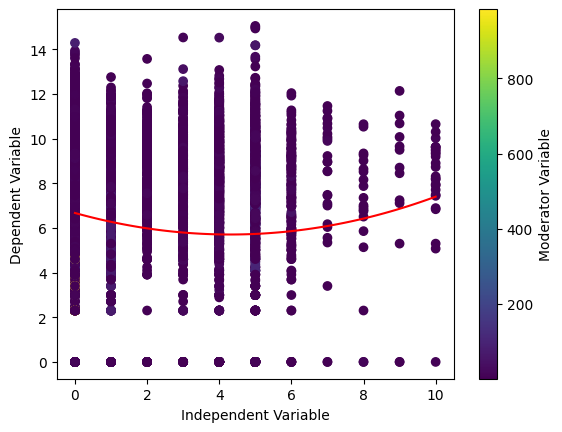

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = extract_data
extract_data['interaction_term'] = df['Future_tense'] * df['Campaign_frequency']\

X = sm.add_constant(df[['Future_tense', 'Campaign_frequency', 'interaction_term']])
model = sm.OLS(df['Log_Actual_Donation_Amount'], X).fit()

independent_vals = np.linspace(df['Future_tense'].min(), df['Future_tense'].max(), 100)
moderator_vals = np.linspace(df['Campaign_frequency'].min(), df['Campaign_frequency'].max(), 100)
interaction_vals = independent_vals * moderator_vals
new_data = pd.DataFrame({'Future_tense': independent_vals, 'Campaign_frequency': moderator_vals, 'interaction_term': interaction_vals})
new_data = sm.add_constant(new_data)
new_data['predicted_dependent_variable'] = model.predict(new_data)

fig, ax = plt.subplots()
scatter = ax.scatter(df['Future_tense'], df['Log_Actual_Donation_Amount'], c=df['Campaign_frequency'], cmap='viridis')
line = ax.plot(new_data['Future_tense'], new_data['predicted_dependent_variable'], color='red')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
fig.colorbar(scatter, label='Moderator Variable')
plt.show()


